# COMPERATIVE RNA SEQUENCING OF METTL14 GENE KNOCKDOWN CELLS

Link to the chosen dataset:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE81164

This study investigates the role of METTL14, which is an RNA N6-adenosine methyltransferase, in breast cancer cell proliferation. It forms a dimer with METTL3, which in turn methylates the Adenosine in 6th position of some mRNAs. METTL14 constitutes the RNA binding part, rather than the catalytic core of the resulting dimer. This methylation plays a role in destabilizing of the target mRNA and its degradation. It has a balancer, ALKBH5 which is the demethylase of the same residue. METTL14/ALKBH5 duo has a feedback loop in which they control each others expression.

METTL14/ALKBH5 support cancer growth by regulating the methyladenosine(m6A) levels of epithelial to mesenchymal transition (attachment of cancer cells to skeletal and connective tissue) and angiogenesis (blood vessel formation for cancer cell nutrition) associated transcripts. It is suggested in this study that METTL14/ALKBH5 iinhibit the m6A reader protein "YTHDF3", thus blocking the degradation of angiogenesis and epithelial-to-mesenchymal transition related transcripts.

Some target genes of METTL14 includes SMAD3 and CyclinD (CCND1), which take part in cell proliferation and cell cycle regulation. These two genes along with YTHDF3 will be used as positive control genes in this RNA-Seq analysis.

In [43]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/AssignmentDataset
cd /mnt/storage/$USER/jupyternotebooks/AssignmentDataset
ls

 Aligned.out.sam               SRR3478129_1_fastqc.zip
 controlRep1                   SRR3478129_2.fastq
 controlRep2                   SRR3478129_2_fastqc.html
'*.fastq'                      SRR3478129_2_fastqc.zip
 FASTQC_Report_Details.ipynb   SRR3478130_1.fastq
 Log.out                       SRR3478130_1_fastqc.html
 Log.progress.out              SRR3478130_1_fastqc.zip
 master_notebook.ipynb         SRR3478130_2.fastq
 MetKDRep1                     SRR3478130_2_fastqc.html
 MetKDRep2                     SRR3478130_2_fastqc.zip
 SRR3478128_1.fastq            SRR3478131_1.fastq
 SRR3478128_1_fastqc.html      SRR3478131_1_fastqc.html
 SRR3478128_1_fastqc.zip       SRR3478131_1_fastqc.zip
 SRR3478128_2.fastq            SRR3478131_2.fastq
 SRR3478128_2_fastqc.html      SRR3478131_2_fastqc.html
 SRR3478128_2_fastqc.zip       SRR3478131_2_fastqc.zip
 SRR3478129_1.fastq            _STARtmp
 SRR3478129_1_fastqc.html


Get the SRA files from NCBI

In [16]:
prefetch SRR3478131 > MetKDRep2
prefetch SRR3478130 > MetKDRep1
prefetch SRR3478129 > controlRep2
prefetch SRR3478128 > controlRep1

Get the FASTQ files from SRA files

In [17]:
fastq-dump --split-files SRR3478131 #METTL14 KnockDown Rep2
fastq-dump --split-files SRR3478130 #METTL14 KnockDown Rep2
fastq-dump --split-files SRR3478129 #controlRep2
fastq-dump --split-files SRR3478128 #controlRep1

Read 47586779 spots for SRR3478131
Written 47586779 spots for SRR3478131
Read 50118842 spots for SRR3478130
Written 50118842 spots for SRR3478130
Read 48792502 spots for SRR3478129
Written 48792502 spots for SRR3478129
Read 53997462 spots for SRR3478128
Written 53997462 spots for SRR3478128


Check the FASTq Files

In [5]:
head -10 SRR3478128_1.fastq
head -10 SRR3478128_2.fastq
echo "---------------------------------------------------------------"
head -10 SRR3478129_1.fastq
head -10 SRR3478129_2.fastq
echo "---------------------------------------------------------------"
head -10 SRR3478130_1.fastq
head -10 SRR3478130_2.fastq
echo "---------------------------------------------------------------"
head -10 SRR3478131_1.fastq
head -10 SRR3478131_2.fastq

@SRR3478128.1 D1317JN1:280:C5RT4ACXX:6:1101:1134:2164 length=101
GGCAAACATTGCACAGCTAGGCACTAAGGAGAGAGAAAGGGACACAGCGGGGCATGGCCAGAAAACTGGAATTGAGCTGAGTGGAGGCACCAAGACCTGCG
+SRR3478128.1 D1317JN1:280:C5RT4ACXX:6:1101:1134:2164 length=101
CCCFFFFFHHGHHJJJJJJHIJIJIIJHJHIHHGIDHGHIJJJJJJJJJJJDDDDDDDDCBADCDDDCA>ACCAC:@CDDB>ABCDB?BDDDDD?CACDDB
@SRR3478128.2 D1317JN1:280:C5RT4ACXX:6:1101:1158:2166 length=101
GTCAGGTTTTAACCAAGCGATTTTCCATTAAATATTCTCCCAGATGTTCTGGAAGTTTTTTCGTGTATCTTTGCATCTTCAGAGCTGCTCCACTGTGCCAC
+SRR3478128.2 D1317JN1:280:C5RT4ACXX:6:1101:1158:2166 length=101
@CCDFFADFHGHFFGBHIIIHJDIFHIEIIIJIJJJIIHIGIHHIIGADGIICEGBFIJGHHH6@@AHEHFHG:B??CDEF:;AC@ACCCDCCCCCCD@CA
@SRR3478128.3 D1317JN1:280:C5RT4ACXX:6:1101:1105:2188 length=101
AGAGAAACAAACTGCTCATCATCTTCTAATTCTCTAGCTGCACCAAAATCTGTGAGTTTGTACACAGACTGTCCATCTTCCCCTATAACACGCATGATATT
@SRR3478128.1 D1317JN1:280:C5RT4ACXX:6:1101:1134:2164 length=101
GACCATATGAACTCAAAACTAGTTGTGGCAGAGGGACCCTGAAGAGATCTACCCCTGGTGAATGCCCCCAGGAGTGGGCTGTTCTCACACCTGGTGCCCA

## Quality Control

The FASTQ files obtained has to undergo a quality check to see if there has been problems during sequencing. This can be achieved by using FASTQC

In [23]:
/usr/bin/fastqc -o . SRR3478128_1.fastq
/usr/bin/fastqc -o . SRR3478128_2.fastq
/usr/bin/fastqc -o . SRR3478129_1.fastq
/usr/bin/fastqc -o . SRR3478129_2.fastq
/usr/bin/fastqc -o . SRR3478130_1.fastq
/usr/bin/fastqc -o . SRR3478130_2.fastq
/usr/bin/fastqc -o . SRR3478131_1.fastq
/usr/bin/fastqc -o . SRR3478131_2.fastq

Started analysis of SRR3478128_2.fastq
Approx 5% complete for SRR3478128_2.fastq
Approx 10% complete for SRR3478128_2.fastq
Approx 15% complete for SRR3478128_2.fastq
Approx 20% complete for SRR3478128_2.fastq
Approx 25% complete for SRR3478128_2.fastq
Approx 30% complete for SRR3478128_2.fastq
Approx 35% complete for SRR3478128_2.fastq
Approx 40% complete for SRR3478128_2.fastq
Approx 45% complete for SRR3478128_2.fastq
Approx 50% complete for SRR3478128_2.fastq
Approx 55% complete for SRR3478128_2.fastq
Approx 60% complete for SRR3478128_2.fastq
Approx 65% complete for SRR3478128_2.fastq
Approx 70% complete for SRR3478128_2.fastq
Approx 75% complete for SRR3478128_2.fastq
Approx 80% complete for SRR3478128_2.fastq
Approx 85% complete for SRR3478128_2.fastq
Approx 90% complete for SRR3478128_2.fastq
Approx 95% complete for SRR3478128_2.fastq
Analysis complete for SRR3478128_2.fastq
Started analysis of SRR3478129_1.fastq
Approx 5% complete for SRR3478129_1.fastq
Approx 10% complete for

The results of FASTQC can be seen more in detail in the jupyter notebook called "FASTQC_Report_Details"

## Mapping Reads to the Reference Genome

STAR will be used to map the obtained reads to the reference human genome. hg19 will be used as the reference, it can be found on the gbiomed server. hg19 contains both the genome and gene annotations associated with it.

In [67]:
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad NoSharedMemory \
     --runThreadN 15 \
     --readFilesIn ./SRR3478128_1.fastq ./SRR3478128_2.fastq \
     --outFileNamePrefix control1.
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad NoSharedMemory \
     --runThreadN 15 \
     --readFilesIn SRR3478129_1.fastq SRR3478129_2.fastq \
     --outFileNamePrefix control2.
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad NoSharedMemory \
     --runThreadN 15 \
     --readFilesIn SRR3478130_1.fastq SRR3478130_2.fastq \
     --outFileNamePrefix mttl1.
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad NoSharedMemory \
     --runThreadN 15 \
     --readFilesIn SRR3478131_1.fastq SRR3478131_2.fastq \
     --outFileNamePrefix mttl2.

Nov 07 00:44:44 ..... started STAR run
Nov 07 00:44:44 ..... loading genome
Nov 07 00:45:01 ..... started mapping
Nov 07 00:50:05 ..... finished successfully
Nov 07 00:50:06 ..... started STAR run
Nov 07 00:50:06 ..... loading genome
Nov 07 00:50:25 ..... started mapping
Nov 07 00:54:55 ..... finished successfully
Nov 07 00:54:56 ..... started STAR run
Nov 07 00:54:56 ..... loading genome
Nov 07 00:55:26 ..... started mapping
Nov 07 01:00:13 ..... finished successfully
Nov 07 01:00:14 ..... started STAR run
Nov 07 01:00:14 ..... loading genome
Nov 07 01:00:36 ..... started mapping
Nov 07 01:05:09 ..... finished successfully


After the STAR alignment, we now have Aligned.out.sam files for each sample, as well as some log.out files that show specifics of the STAR run.

The Aligned.out.sam files have a SAM format which consists of headers and alignments. Headers start with the '@' character.

We will now make BAM files, which is a binary version of a SAM file. This way it will be easier to both access and store the information. For this, we need to first sort, then index the SAM files.

In [69]:
samtools sort -o control1.bam control1.Aligned.out.sam
samtools sort -o control2.bam control2.Aligned.out.sam
samtools sort -o mttl1.bam mttl1.Aligned.out.sam
samtools sort -o mttl2.bam mttl2.Aligned.out.sam

[bam_sort_core] merging from 32 files and 1 in-memory blocks...
[bam_sort_core] merging from 30 files and 1 in-memory blocks...


In [70]:
samtools index control1.bam
samtools index control2.bam
samtools index mttl1.bam
samtools index mttl2.bam

In [72]:
ls -l *.ba[mi]
samtools view control1.bam | head -3

-rw-r--r-- 1 r0772819 domain users 7103170704 Nov  9 00:28 control1.bam
-rw-r--r-- 1 r0772819 domain users    3310824 Nov  9 10:18 control1.bam.bai
-rw-r--r-- 1 r0772819 domain users 6545415372 Nov  9 00:50 control2.bam
-rw-r--r-- 1 r0772819 domain users    3128368 Nov  9 10:19 control2.bam.bai
-rw-r--r-- 1 r0772819 domain users 6749220834 Nov  9 01:16 mttl1.bam
-rw-r--r-- 1 r0772819 domain users    3268144 Nov  9 10:21 mttl1.bam.bai
-rw-r--r-- 1 r0772819 domain users 6298308413 Nov  9 01:38 mttl2.bam
-rw-r--r-- 1 r0772819 domain users    3170040 Nov  9 10:22 mttl2.bam.bai
SRR3478128.560086	163	chrM	1	255	38S63M	=	64	164	ATAGCCCACACGTTCCCCTTAAATAAGACATCACGATGGATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGGTATTTTCGT	CCCFFFFFHGHHHJJJJJJJJIIJJJJJJJJJJJJJJJJJJJIIJJJIIJFHGGJJJJIJJIJJJJHHHHHFFDDDDDDDDDCDDDDEEDDDACDDDDED?	NH:i:1	HI:i:1	AS:i:158	nM:i:2
SRR3478128.299791	163	chrM	1	255	27S74M	=	11	111	GTTCCCCTTAAATAAGACATCACGATGGATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGGTATTTTC

In [73]:
samtools idxstats control1.bam
echo "---------------------------------------------------------"
samtools idxstats control2.bam
echo "---------------------------------------------------------"
samtools idxstats mttl1.bam
echo "---------------------------------------------------------"
samtools idxstats mttl2.bam

chrM	16571	5619196	0
chr1	249250621	10772520	0
chr2	243199373	8381906	0
chr3	198022430	5404704	0
chr4	191154276	3231902	0
chr5	180915260	6109208	0
chr6	171115067	6188486	0
chr7	159138663	3872028	0
chr8	146364022	2846756	0
chr9	141213431	4364428	0
chr10	135534747	4327404	0
chr11	135006516	6607598	0
chr12	133851895	6709114	0
chr13	115169878	1688262	0
chr14	107349540	4063630	0
chr15	102531392	2858756	0
chr16	90354753	3156412	0
chr17	81195210	6920638	0
chr18	78077248	1493242	0
chr19	59128983	4058894	0
chr20	63025520	3118428	0
chr21	48129895	818468	0
chr22	51304566	1550792	0
chrX	155270560	3206060	0
chrY	59373566	61162	0
*	0	0	0
---------------------------------------------------------
chrM	16571	5411430	0
chr1	249250621	9860942	0
chr2	243199373	7761472	0
chr3	198022430	4989168	0
chr4	191154276	3012300	0
chr5	180915260	5650420	0
chr6	171115067	5812488	0
chr7	159138663	3491996	0
chr8	146364022	2575360	0
chr9	141213431	3912450	0
chr10	135534747	3985650	0
chr11	135006516	6045596	0
chr12	133851

After we constructed and looked at the bam files, we now can look at them with flagstat. Flagstat does a full pasthrough of the input file given, to retrieve certain statistics. We can see that no reads failed the quality control on any category, which is a sign that we are on the right track.

In [74]:
samtools flagstat control1.bam
echo "---------------------------------------------------------"
samtools flagstat control2.bam
echo "---------------------------------------------------------"
samtools flagstat mttl1.bam
echo "---------------------------------------------------------"
samtools flagstat mttl2.bam

107429994 + 0 in total (QC-passed reads + QC-failed reads)
4153242 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
107429994 + 0 mapped (100.00% : N/A)
103276752 + 0 paired in sequencing
51638376 + 0 read1
51638376 + 0 read2
103276752 + 0 properly paired (100.00% : N/A)
103276752 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)
---------------------------------------------------------
98236352 + 0 in total (QC-passed reads + QC-failed reads)
3423640 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
98236352 + 0 mapped (100.00% : N/A)
94812712 + 0 paired in sequencing
47406356 + 0 read1
47406356 + 0 read2
94812712 + 0 properly paired (100.00% : N/A)
94812712 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)
---------------------------------------------------------
1001330

### IGV View of Mapping

IGV is a Genome Browser for visualizing genomic data. Here we will make use of it to see the coverage of two of our positive control genes: YTHDF3 and SMAD3, by giving as input the bam files we created, and their indexes.


Below, we see the IGV views of one of the positive control genes: YTHDF3. The view shows where the most exons are. The upper figure shows its coverage in METTL14 knockdown sample, and the below one shows in control sample.

We can see here that there is a higher coverage of the exons of gene YTHDF3 in METTL14 knockdown sample (the top value for peaks is 275, while in control, the top value is 190 for coverage of these exon areas), which shows a higher expression of YTHDF3 in METTL14 knockdown samples. 

Since YTHDF3 is blocked by METTL14, it's expected to see it expressed highly upon METTL14 knockdown.

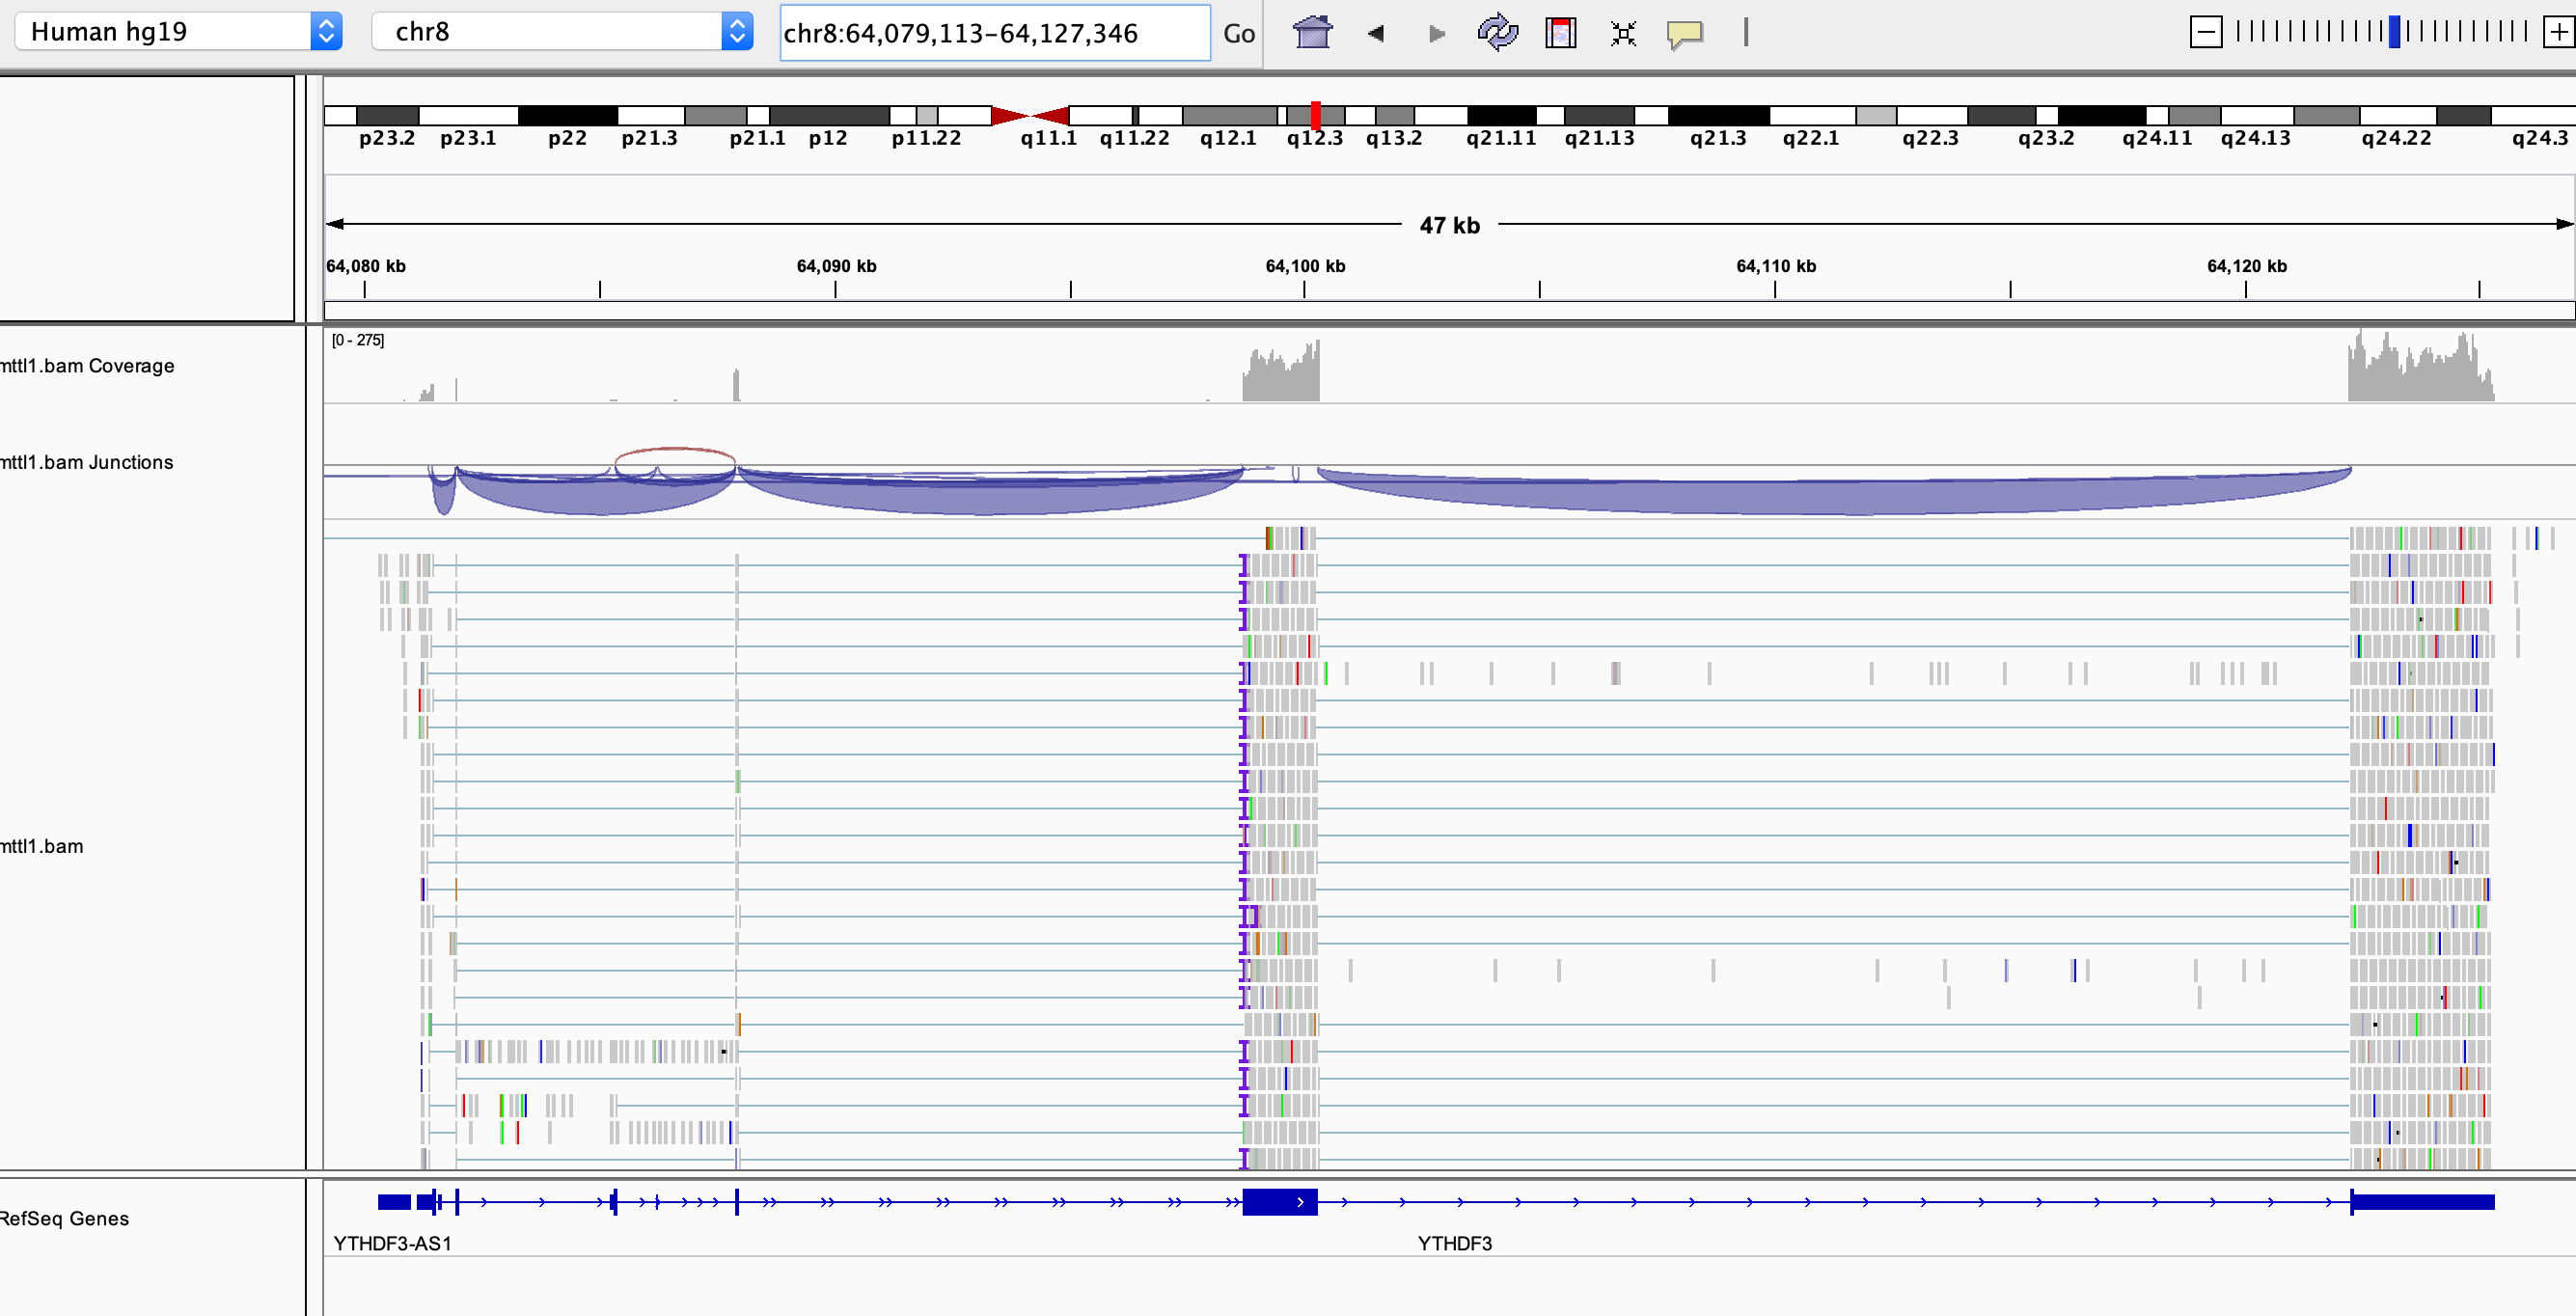
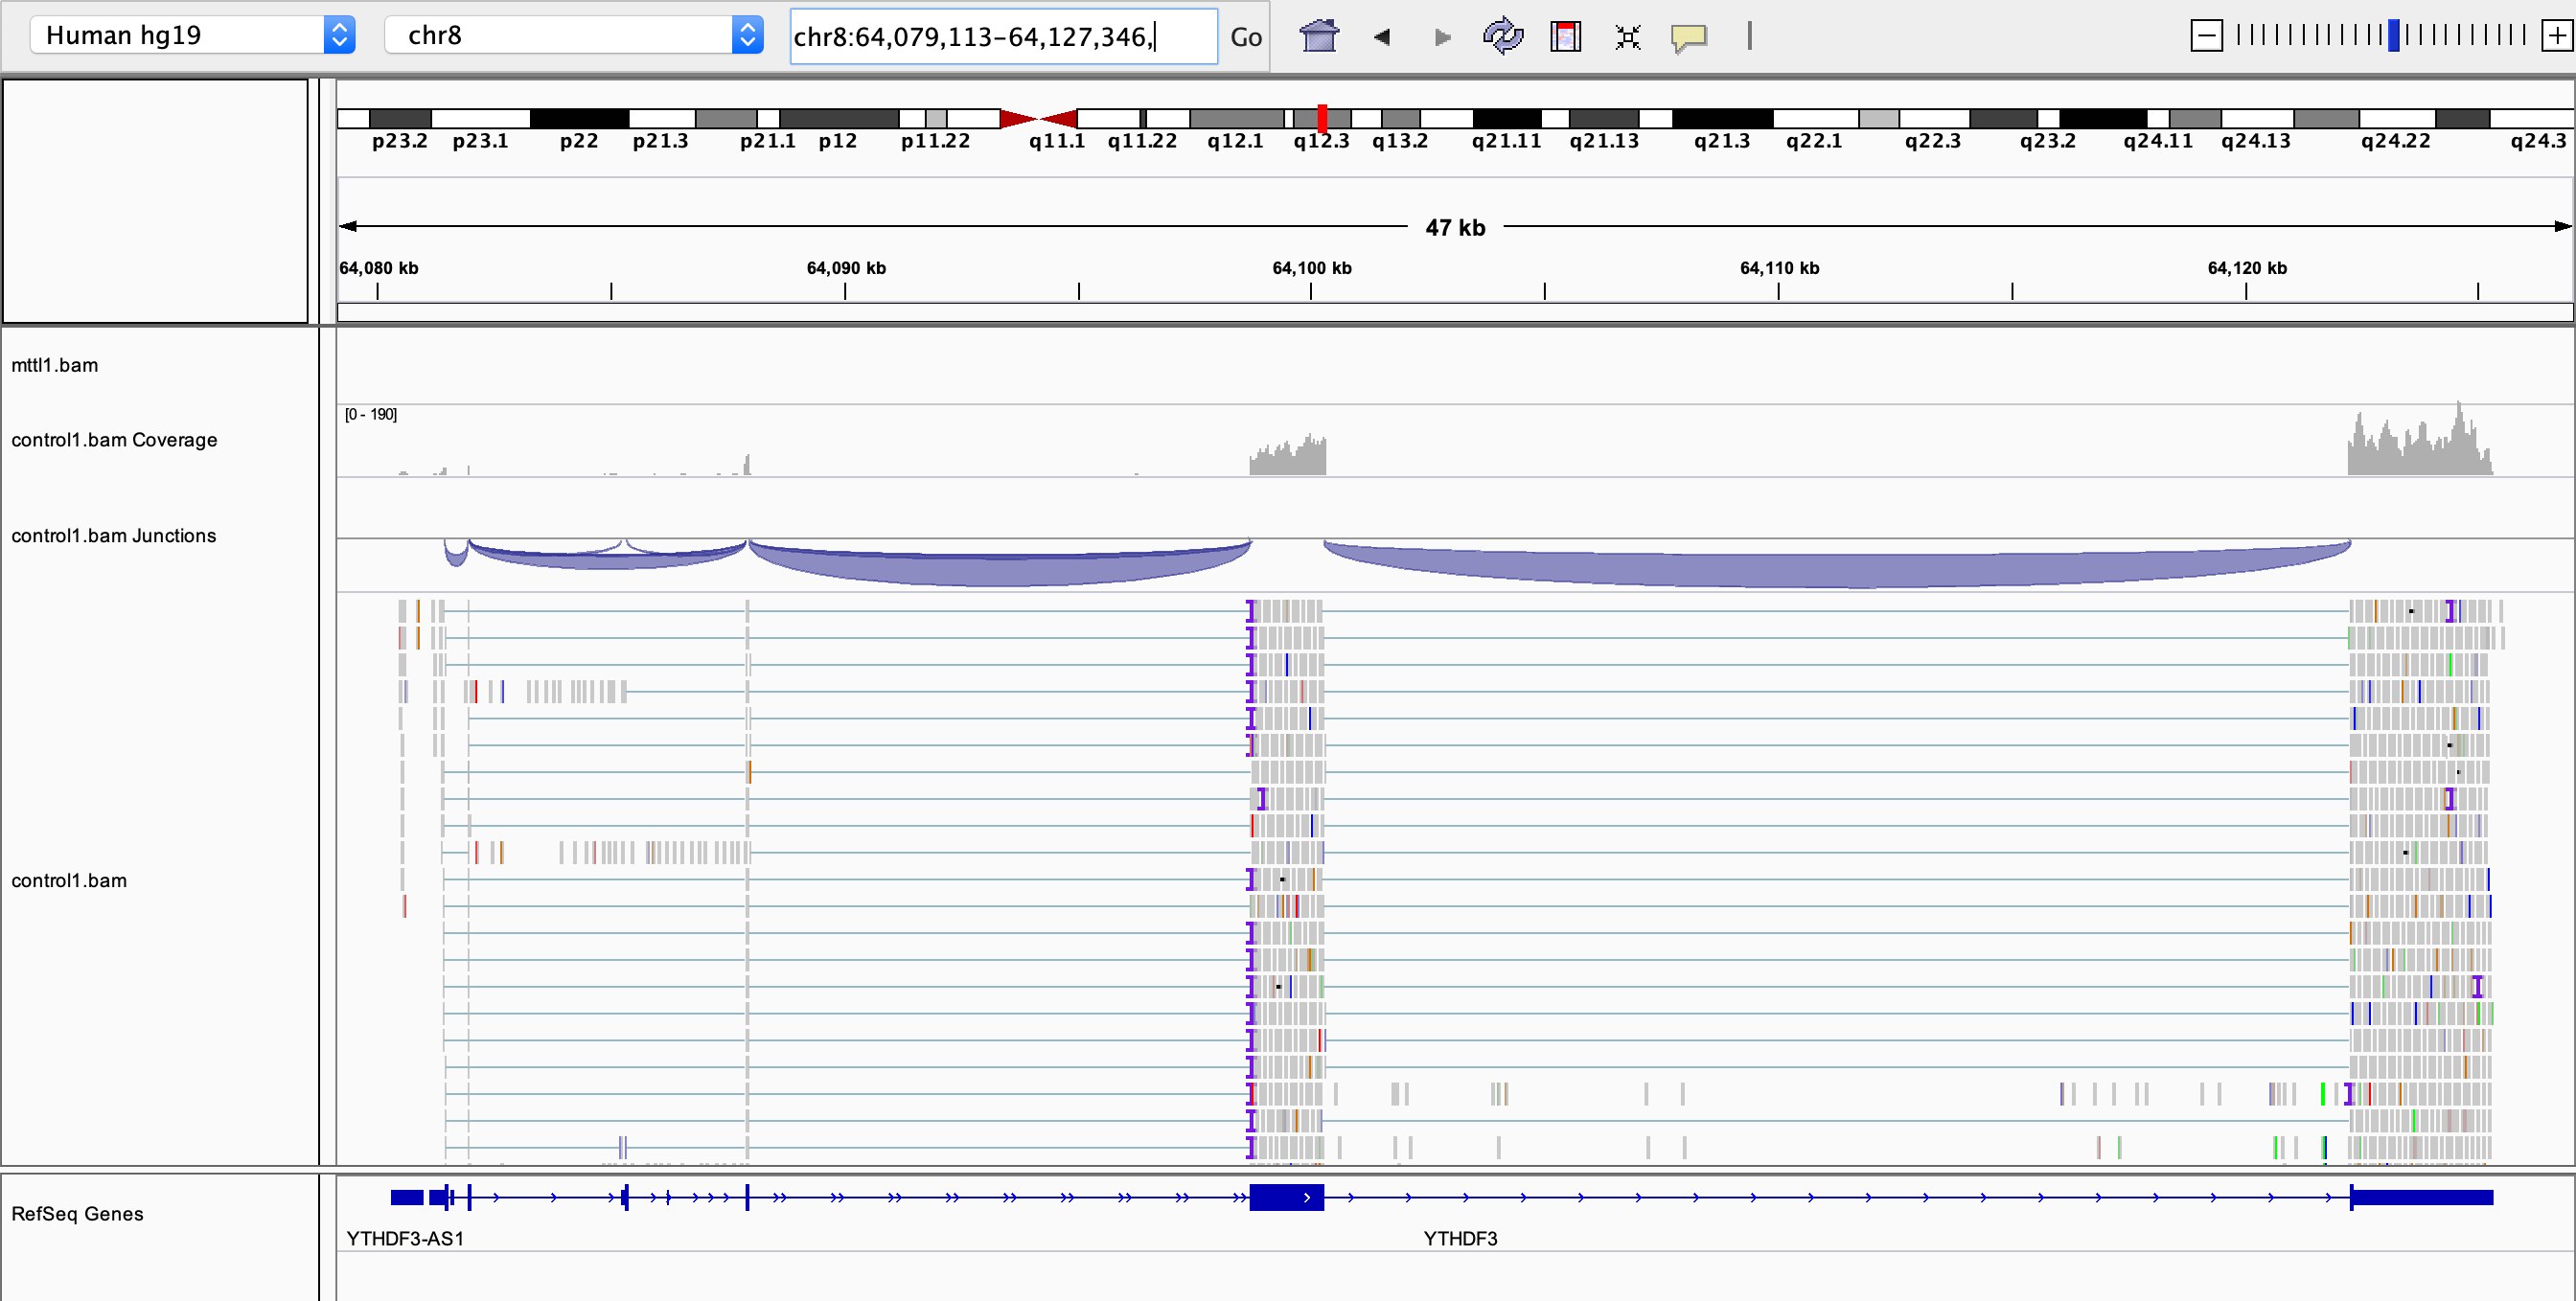

In the below figures, we see the IGV views of the other positive control gene that we will investigate here: SMAD3. The upper figure shows its coverage in control sample, and the below one shows in METTL14 knockdown sample. This view shows the part of SMAD3 genes where there are the most exons, to get a better understanding of their expression.

We can see here that there is a higher coverage of the  same exons of gene SMAD3 in the control sample (the top value for the peaks is 222 for METTL14 knockdown sample, and 337 for the control sample), which shows a higher expression of SMAD3 in control samples.

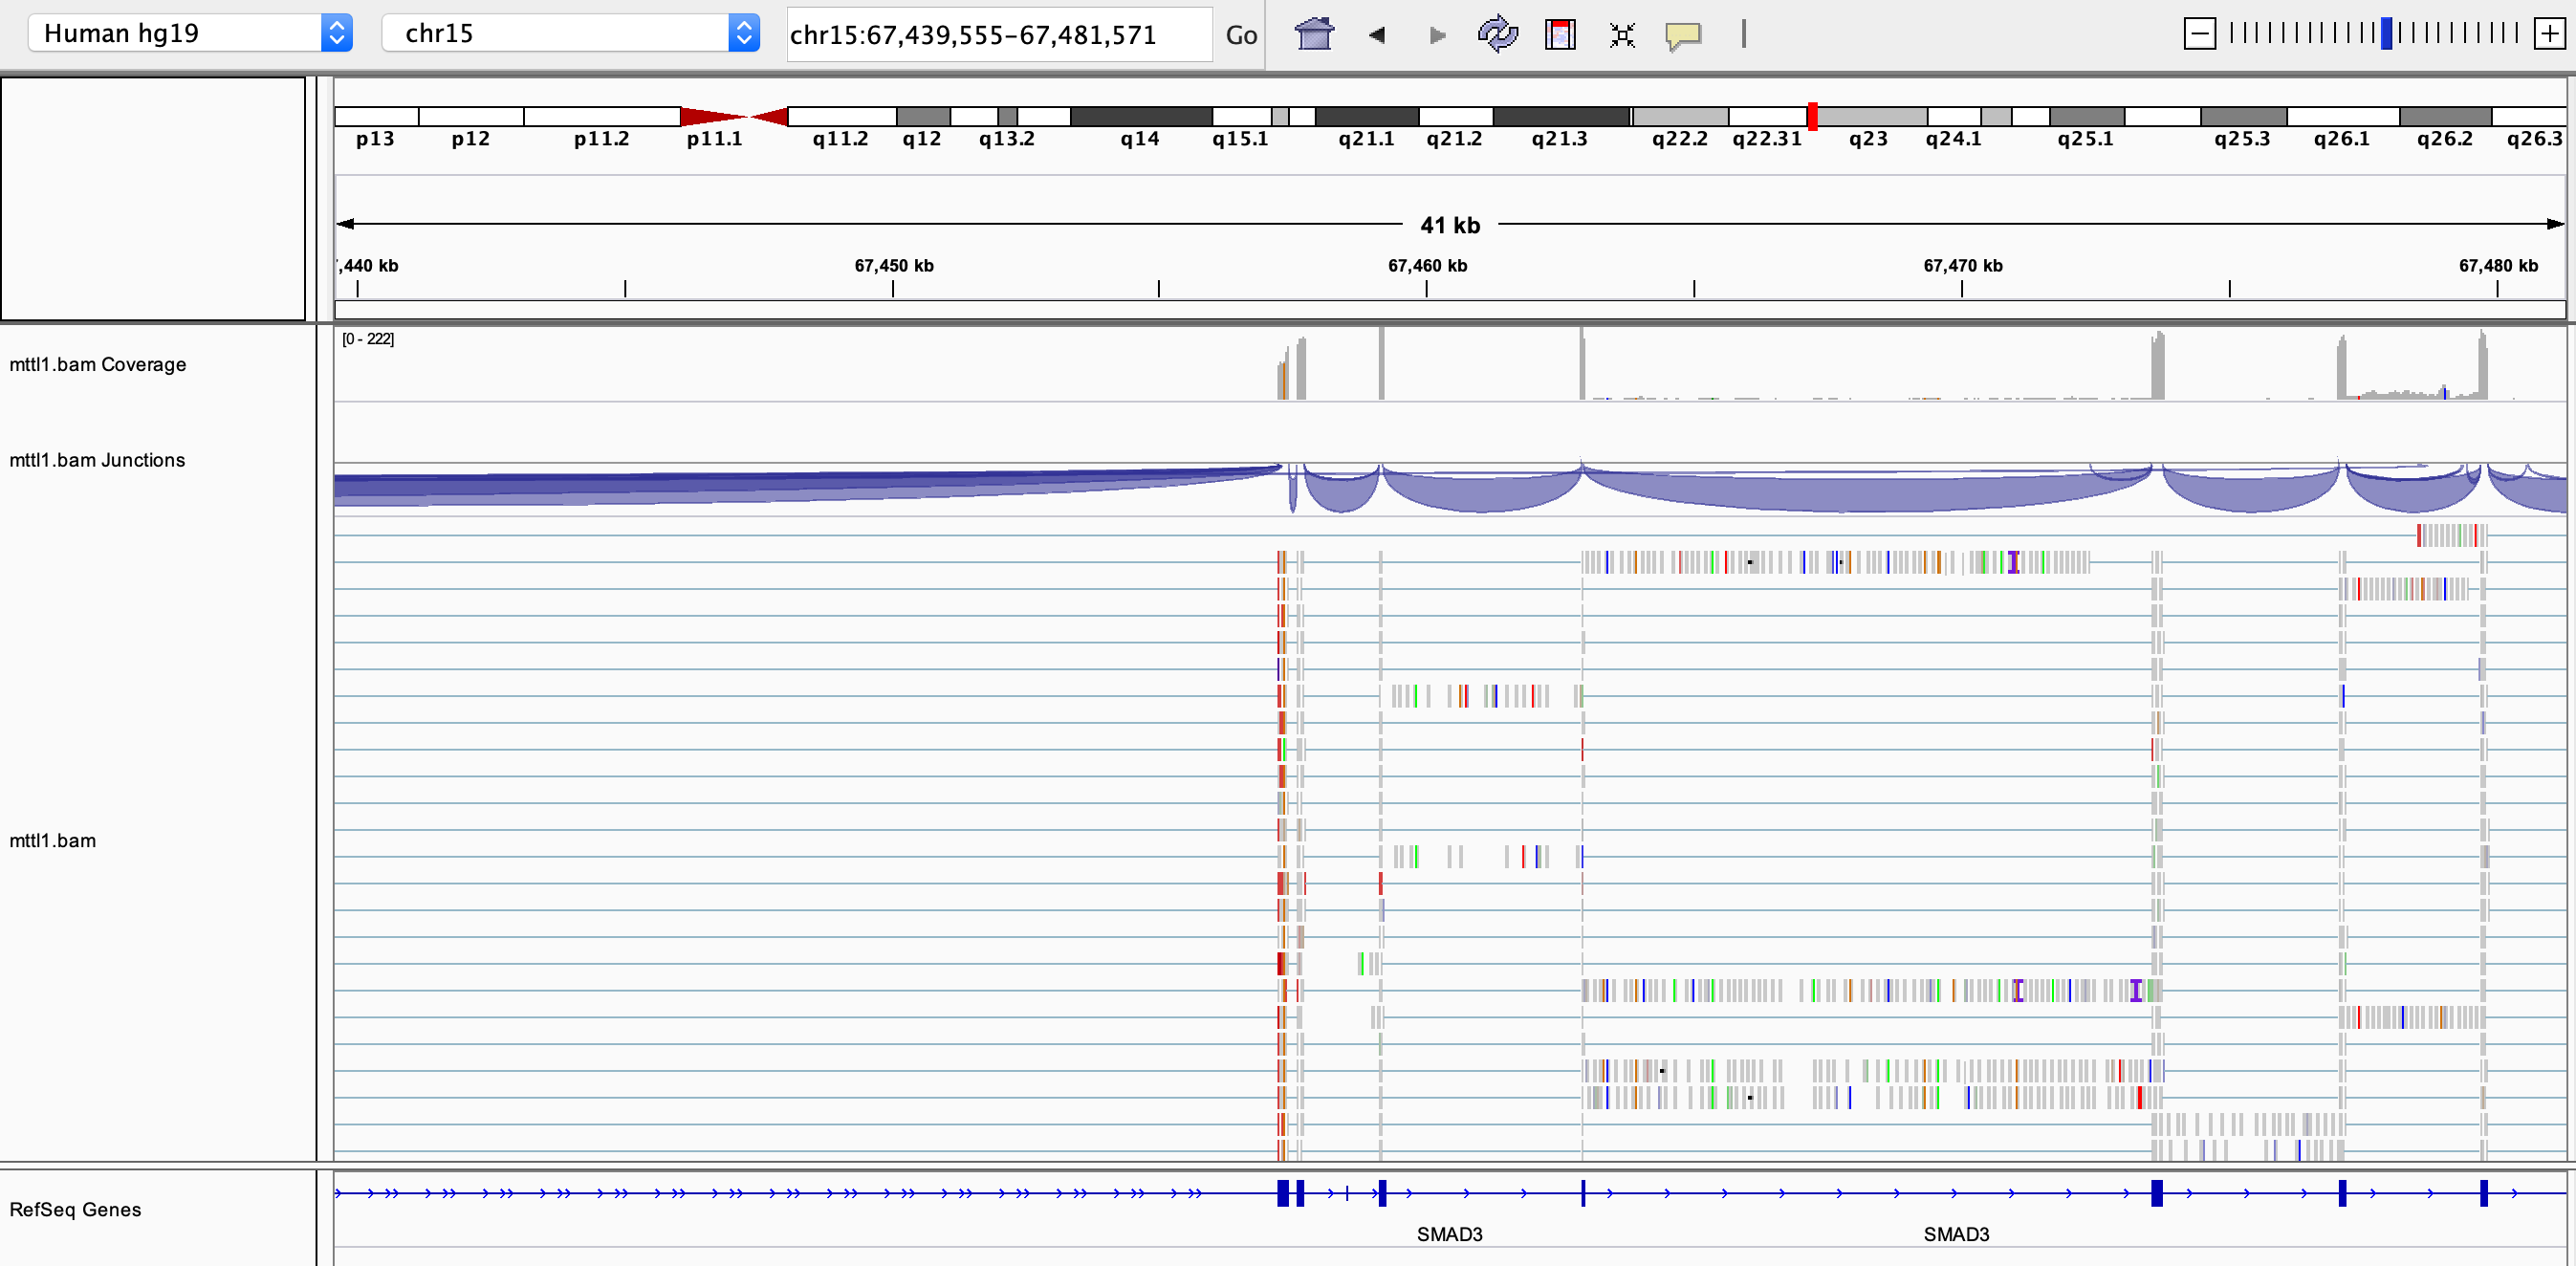
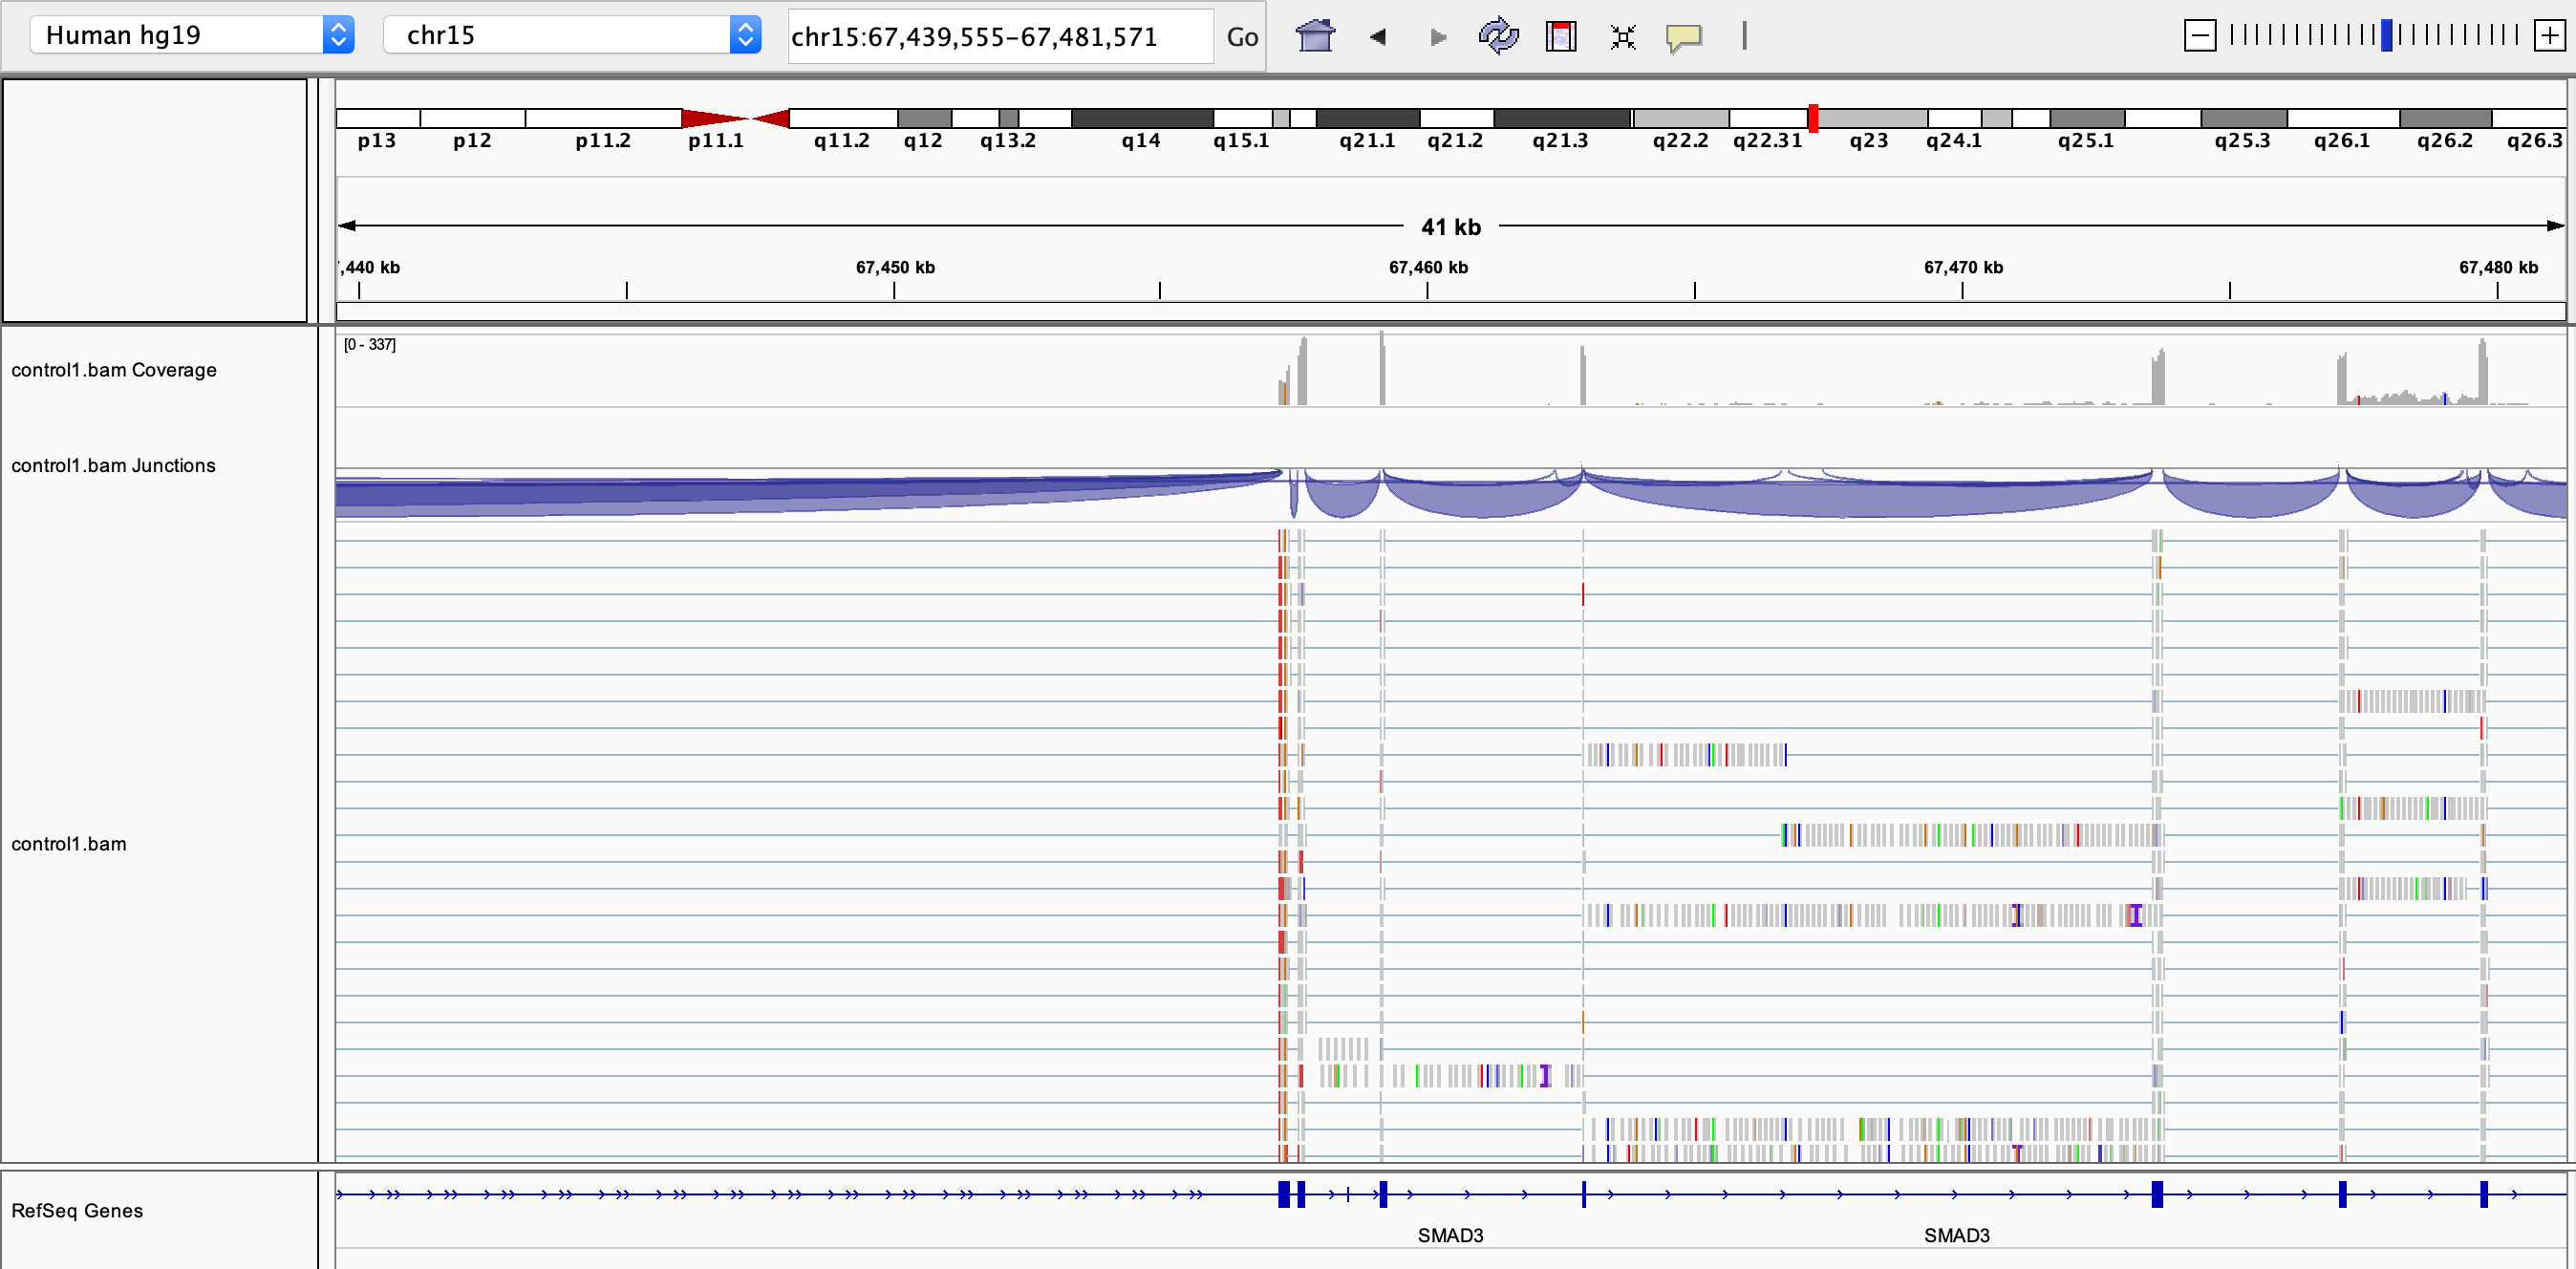

## Find out Number of Reads Mapped to Genes

In [75]:
ln -sf /mnt/storage/data/RNA-seq/gencode.v19.nopseudo.plus.sort.gtf .
ls -l *gtf

lrwxrwxrwx 1 r0772819 domain users 60 Nov 11 21:13 gencode.v19.nopseudo.plus.sort.gtf -> /mnt/storage/data/RNA-seq/gencode.v19.nopseudo.plus.sort.gtf


In [6]:
grep -w SMAD3 gencode.v19.nopseudo.plus.sort.gtf

chr15	HAVANA	exon	67356101	67356282	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000559460.1"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "PUTATIVE"; transcript_name "SMAD3-012"; exon_number 1;  exon_id "ENSE00002548363.1";  level 2; tag "mRNA_end_NF"; tag "cds_end_NF"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417458.1";
chr15	HAVANA	gene	67356101	67487533	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENSG00000166949.11"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "KNOWN"; transcript_name "SMAD3"; level 1; havana_gene "OTTHUMG00000133230.4";
chr15	HAVANA	transcript	67356101	67459176	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000559460.1"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "PUTATIVE"; transcript

chr15	HAVANA	transcript	67418054	67483100	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000540846.2"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "NOVEL"; transcript_name "SMAD3-002"; level 2; tag "basic"; tag "CCDS"; ccdsid "CCDS53950.1"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417460.1";
chr15	HAVANA	UTR	67418054	67418322	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000540846.2"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "NOVEL"; transcript_name "SMAD3-002"; level 2; tag "basic"; tag "CCDS"; ccdsid "CCDS53950.1"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417460.1";
chr15	HAVANA	exon	67420441	67420489	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000558894.1"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "prote

chr15	HAVANA	exon	67457233	67457426	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000540846.2"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "NOVEL"; transcript_name "SMAD3-002"; exon_number 2;  exon_id "ENSE00003618233.1";  level 2; tag "basic"; tag "CCDS"; ccdsid "CCDS53950.1"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417460.1";
chr15	HAVANA	exon	67457233	67457426	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000558739.1"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "PUTATIVE"; transcript_name "SMAD3-014"; exon_number 2;  exon_id "ENSE00003618233.1";  level 1; tag "mRNA_end_NF"; tag "cds_end_NF"; tag "exp_conf"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417463.1";
chr15	HAVANA	exon	67457233	67457426	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST0000055889

chr15	HAVANA	start_codon	67457342	67457344	.	+	0	gene_id "ENSG00000166949.11"; transcript_id "ENST00000559460.1"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "PUTATIVE"; transcript_name "SMAD3-012"; exon_number 2;  exon_id "ENSE00003618233.1";  level 2; tag "mRNA_end_NF"; tag "cds_end_NF"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417458.1";
chr15	HAVANA	start_codon	67457342	67457344	.	+	0	gene_id "ENSG00000166949.11"; transcript_id "ENST00000560175.1"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "NOVEL"; transcript_name "SMAD3-016"; exon_number 2;  exon_id "ENSE00003618233.1";  level 2; tag "mRNA_end_NF"; tag "cds_end_NF"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417725.2";
chr15	HAVANA	stop_codon	67457370	67457372	.	+	0	gene_id "ENSG00000166949.11"; transcript_id "ENST00000559092.1"; 

chr15	HAVANA	exon	67458357	67458531	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000537194.2"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "NOVEL"; transcript_name "SMAD3-004"; exon_number 1;  exon_id "ENSE00002252001.2";  level 1; tag "basic"; tag "exp_conf"; tag "CCDS"; ccdsid "CCDS53951.1"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417464.1";
chr15	HAVANA	transcript	67458357	67483100	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000537194.2"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "NOVEL"; transcript_name "SMAD3-004"; level 1; tag "basic"; tag "exp_conf"; tag "CCDS"; ccdsid "CCDS53951.1"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417464.1";
chr15	HAVANA	UTR	67458357	67458531	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000537194.2"; gene_type "p

chr15	HAVANA	exon	67459117	67459191	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000540846.2"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "NOVEL"; transcript_name "SMAD3-002"; exon_number 4;  exon_id "ENSE00003631227.1";  level 2; tag "basic"; tag "CCDS"; ccdsid "CCDS53950.1"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417460.1";
chr15	HAVANA	exon	67459117	67459191	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000558827.1"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "PUTATIVE"; transcript_name "SMAD3-008"; exon_number 2;  exon_id "ENSE00003642810.1";  level 2; tag "mRNA_end_NF"; tag "cds_end_NF"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417467.1";
chr15	HAVANA	exon	67459117	67459191	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000558894.1"; gene_type 

chr15	HAVANA	CDS	67462892	67462942	.	+	2	gene_id "ENSG00000166949.11"; transcript_id "ENST00000558894.1"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "NOVEL"; transcript_name "SMAD3-013"; exon_number 5;  exon_id "ENSE00003537758.1";  level 1; tag "mRNA_end_NF"; tag "cds_end_NF"; tag "exp_conf"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417461.2";
chr15	HAVANA	CDS	67462892	67462942	.	+	2	gene_id "ENSG00000166949.11"; transcript_id "ENST00000560175.1"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "NOVEL"; transcript_name "SMAD3-016"; exon_number 5;  exon_id "ENSE00003468279.1";  level 2; tag "mRNA_end_NF"; tag "cds_end_NF"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417725.2";
chr15	HAVANA	exon	67462892	67462942	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000327367.4"; gene_type

chr15	HAVANA	CDS	67473579	67473791	.	+	2	gene_id "ENSG00000166949.11"; transcript_id "ENST00000558894.1"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "NOVEL"; transcript_name "SMAD3-013"; exon_number 6;  exon_id "ENSE00001108067.1";  level 1; tag "mRNA_end_NF"; tag "cds_end_NF"; tag "exp_conf"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417461.2";
chr15	HAVANA	exon	67473579	67473758	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000558428.1"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "PUTATIVE"; transcript_name "SMAD3-009"; exon_number 3;  exon_id "ENSE00002537400.1";  level 2; tag "mRNA_end_NF"; tag "cds_end_NF"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417466.1";
chr15	HAVANA	exon	67473579	67473791	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000327367.4"; gene_

chr15	HAVANA	exon	67477113	67477202	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000560424.1"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "NOVEL"; transcript_name "SMAD3-007"; exon_number 1;  exon_id "ENSE00002557889.1";  level 1; tag "mRNA_start_NF"; tag "cds_start_NF"; tag "exp_conf"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417469.2";
chr15	HAVANA	transcript	67477113	67483179	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000560424.1"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "NOVEL"; transcript_name "SMAD3-007"; level 1; tag "mRNA_start_NF"; tag "cds_start_NF"; tag "exp_conf"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417469.2";
chr15	HAVANA	exon	67479000	67479847	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000558763.1"; gene_type "protein_codi

chr15	HAVANA	CDS	67482751	67482871	.	+	1	gene_id "ENSG00000166949.11"; transcript_id "ENST00000439724.3"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "NOVEL"; transcript_name "SMAD3-003"; exon_number 9;  exon_id "ENSE00002561043.1";  level 1; tag "basic"; tag "exp_conf"; tag "CCDS"; ccdsid "CCDS45288.1"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417462.1";
chr15	HAVANA	CDS	67482751	67482871	.	+	1	gene_id "ENSG00000166949.11"; transcript_id "ENST00000537194.2"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "NOVEL"; transcript_name "SMAD3-004"; exon_number 7;  exon_id "ENSE00002563618.1";  level 1; tag "basic"; tag "exp_conf"; tag "CCDS"; ccdsid "CCDS53951.1"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417464.1";
chr15	HAVANA	CDS	67482751	67482871	.	+	1	gene_id "ENSG00000166949.11"; transcrip

chr15	HAVANA	UTR	67482872	67487533	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000327367.4"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "protein_coding"; transcript_status "KNOWN"; transcript_name "SMAD3-001"; level 2; tag "basic"; tag "appris_principal"; tag "CCDS"; ccdsid "CCDS10222.1"; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000256967.2";
chr15	HAVANA	exon	67485211	67485518	.	+	.	gene_id "ENSG00000166949.11"; transcript_id "ENST00000560402.1"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SMAD3"; transcript_type "retained_intron"; transcript_status "KNOWN"; transcript_name "SMAD3-011"; exon_number 2;  exon_id "ENSE00002553569.1";  level 2; havana_gene "OTTHUMG00000133230.4"; havana_transcript "OTTHUMT00000417468.1";


featureCounts is a tool that can be used to map reads to genes, giving as output the number or reads associated with each gene. It takes as input BAM file(s) and a GTF file. The GTF file contains a link to a part of the human genome, which gives us information about what the coordinates of genes are. The BAM file shows where each read were mapped to where on the genome.

In [79]:
featureCounts \
    -Q 10 \
    -g gene_name \
    -a /mnt/nfs/data/RNA-seq/gencode.v19.nopseudo.plus.sort.gtf \
    -o all.counts \
    control1.bam control2.bam mttl1.bam mttl2.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 4 BAM files                                      ||
||                           P control1.bam                                   ||
||                           P control2.bam                                   ||
||                           P mttl1.bam                                      ||
||                           P mttl2.bam                         

In [80]:
head all.counts

# Program:featureCounts v1.6.0; Command:"featureCounts" "-Q" "10" "-g" "gene_name" "-a" "/mnt/nfs/data/RNA-seq/gencode.v19.nopseudo.plus.sort.gtf" "-o" "all.counts" "control1.bam" "control2.bam" "mttl1.bam" "mttl2.bam" 
Geneid	Chr	Start	End	Strand	Length	control1.bam	control2.bam	mttl1.bam	mttl2.bam
MIR1302-11	chr1;chr1;chr1;chr1;chr1;chr1	29554;30267;30366;30564;30976;30976	30039;30667;30503;30667;31097;31109	+;+;+;+;+;+	1021	0	0	0	0
FAM138A	chr1;chr1;chr1;chr1;chr1	34554;35245;35277;35721;35721	35174;35481;35481;36073;36081	-;-;-;-;-	1219	0	0	0	0
OR4F5	chr1	69091	70008	+	918	0	0	0	0
RP11-34P13.7	chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1	89295;92091;92230;110953;112700;112700;112700;120721;120775;129055;129055;129081;133374	91629;92240;92240;111357;112804;112804;112804;120932;120932;129173;129217;129223;133566	-;-;-;-;-;-;-;-;-;-;-;-;-	3569	9	5	11	0
RP11-34P13.8	chr1;chr1	89551;90287	90050;91105	-;-	1319	0	0	0	0
AL627309.1	chr1;chr1	134901;137621	135802;139379	-

In [81]:
cut -f-6 all.counts > all.genedata.tsv

In [82]:
head all.genedata.tsv

# Program:featureCounts v1.6.0; Command:"featureCounts" "-Q" "10" "-g" "gene_name" "-a" "/mnt/nfs/data/RNA-seq/gencode.v19.nopseudo.plus.sort.gtf" "-o" "all.counts" "control1.bam" "control2.bam" "mttl1.bam" "mttl2.bam" 
Geneid	Chr	Start	End	Strand	Length
MIR1302-11	chr1;chr1;chr1;chr1;chr1;chr1	29554;30267;30366;30564;30976;30976	30039;30667;30503;30667;31097;31109	+;+;+;+;+;+	1021
FAM138A	chr1;chr1;chr1;chr1;chr1	34554;35245;35277;35721;35721	35174;35481;35481;36073;36081	-;-;-;-;-	1219
OR4F5	chr1	69091	70008	+	918
RP11-34P13.7	chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1	89295;92091;92230;110953;112700;112700;112700;120721;120775;129055;129055;129081;133374	91629;92240;92240;111357;112804;112804;112804;120932;120932;129173;129217;129223;133566	-;-;-;-;-;-;-;-;-;-;-;-;-	3569
RP11-34P13.8	chr1;chr1	89551;90287	90050;91105	-;-	1319
AL627309.1	chr1;chr1	134901;137621	135802;139379	-;-	2661
RP11-34P13.14	chr1;chr1	139790;140075	139847;140339	-;-	323
RP11-34P13.13	chr1;

In [83]:
cut -f1,7- all.counts | grep -v '^#' > all.gene.counts

below we look at our positive control genes, and how many reads were mapped to each of them in each condition (control1, contol2, knockdown1, knockdown2 respectively):

In [14]:
grep CCND1 all.gene.counts
grep SMAD3 all.gene.counts
grep YTHDF3 all.gene.counts

CCND1	17095	15110	7376	6709
SMAD3	21603	20582	10078	9111
YTHDF3-AS1	18	6	16	12
YTHDF3	3698	3517	6993	7077


# RNA-Seq Analysis with DESeq2

This part of the analysis can be found in detail in the jupyter notebook: "DESeq2_Analysis.ipynb"

# Functional Analysis of Gene Signatures

In this part of the analysis, we will investigate the differentially expressed genes we have found with DESeq analysis. We will use various tools to identify the functions of our differentially expressed genes, to reach conclusions about our knockdown group, and the METTL14 gene they lack.

In [84]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/AssignmentDataset/functional_analysis/
cd /mnt/storage/$USER/jupyternotebooks/AssignmentDataset/functional_analysis/

In [87]:
ln -sf /mnt/storage/$USER/jupyternotebooks/AssignmentDataset/deseq.results.tsv .

Let's look at our positive control genes from the DESeq results file:

They can be seen here to be upregulated. Even though the log change is not 2, the p-adj value is much smaller than 0.05. We can say that they show significant downregulation upon METTL14 knockdown.

In [88]:
head -1 deseq.results.tsv
grep -n SMAD3 deseq.results.tsv
grep -n CCND1 deseq.results.tsv

	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
261:SMAD3	15143.5520089568	-1.06794760472251	0.132989147210053	-8.03033651336761	9.72056690735759e-16	6.20359102668402e-14
198:CCND1	11397.9362286381	-1.12079019003857	0.130662106676684	-8.57777529036712	9.67256758579042e-18	8.14705146959495e-16


## Arbitrary Approach
We will now get the gene names of up/down regulated genes. We will use an arbitrary threshold of 0.05 for the p-adjusted value, and a threshold of 1 (or -1 for downregulation) for log fold change. We will also leave out any gene with an NA expression level (log fold change).

In our DESeq results, gene names are found in column 1, log fold changes in column 3 and p-adj values in column 7.

In [2]:
awk '$3 != "NA" && $3 > 1 && $7 < 0.05 {print $1}' deseq.results.tsv > up-logFC1-p05.txt

In [3]:
awk '$3 != "NA" && $3 < -1 && $7 < 0.05 {print $1}' deseq.results.tsv > down-logFC1-p05.txt

In [4]:
wc -l up-logFC1-p05.txt
wc -l down-logFC1-p05.txt

495 up-logFC1-p05.txt
375 down-logFC1-p05.txt


by using the "word count (wc)" prompt, we see that there are 496 upregulated, and 375 downregulated genes, according to our thresholds.

### Analysis with Humanmine

Humanmine database takes in a list of genes (like we created above), and looks at their enrichment in pathways, Gene Orthology, their chromosome distributions, interactions with other proteins and protein domain enrichments. The most interesting part to us of this analysis is the "Pathway Enrichment" given as output.

The pathway enrichments of our upregulated genes can be seen in the figure below:

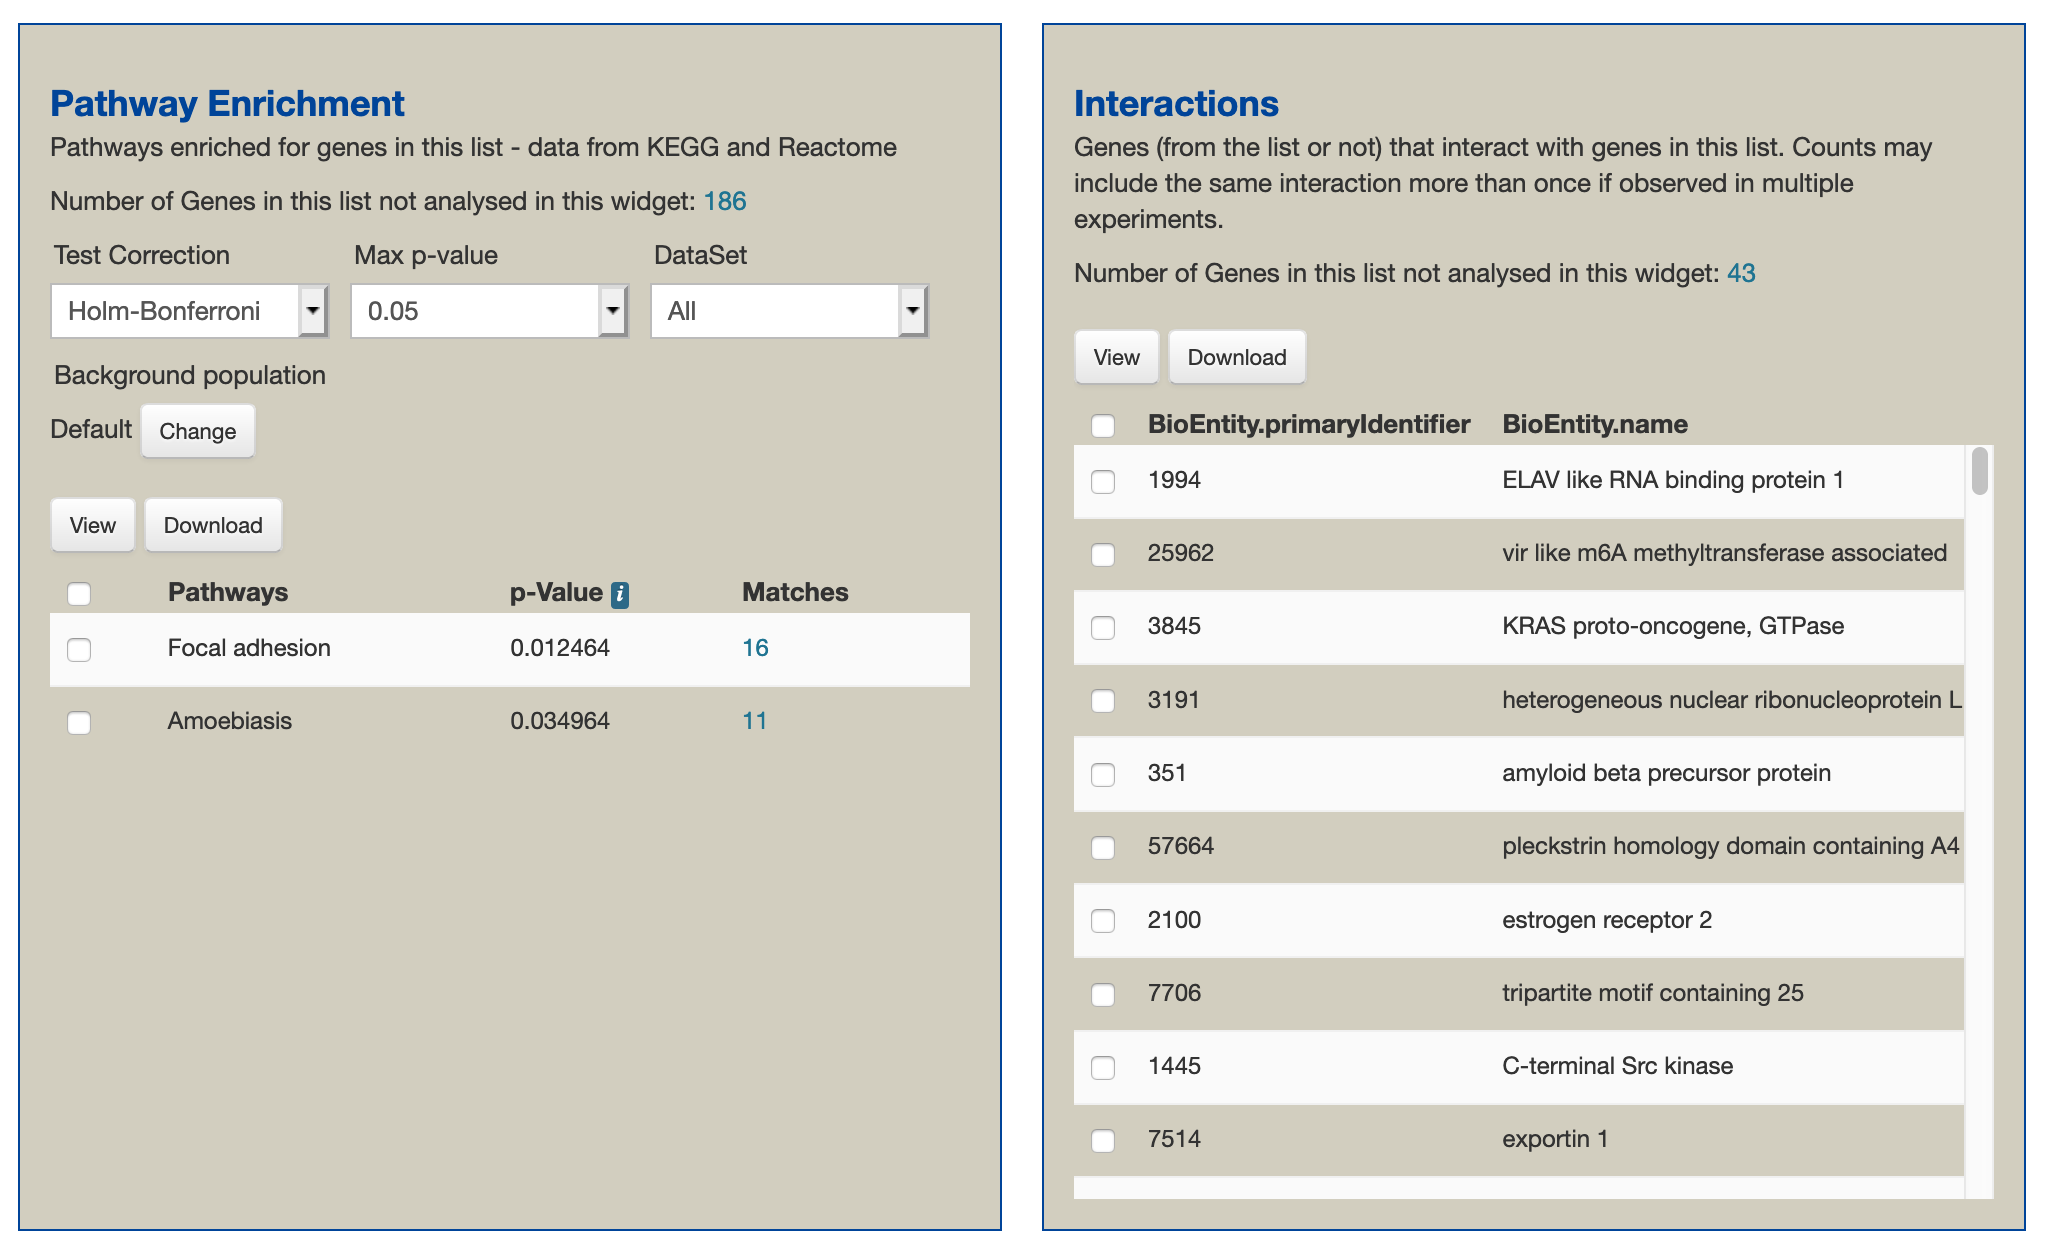

Here we see that main two pathways that are enriched are: the focal adhesion pathway, and amoebiasis pathway. This shows that in our upregulated genes, there are a significant number of genes that are associated with these two pathways.

Focal ahdesions are cell-matrix adhesions, which are responsible for the intake of regulatory signals from the extracellular matrix. It is also already known that focal adhesion formation is correlated with cell movement during epithelial to mesenchymal transitions (ETM). METTL14 was suspected to support breast cancer development by regulating the transcripts responsible for ETM. Thus, the results we get from humanmine are promising.

## Ranking Approach to Determine the Leading Edge

In a rank based approach, unlike the Arbitrary Approach where we gave arbitrary thresholds for the p-adj value and the logFC, the genes at hand (the differentially expressed genes) are firstly ranked, starting from the one that was most upregulated (the one with the biggest logFC), to the one that was most downregulated (the one with the smallest logFC).

For this we can sort the differentially expressed genes list we got from DESeq Analysis in a descending fashion based on the logFC (which is in the 3rd column):

In [7]:
cat deseq.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1}' | grep -v Gene > deseq.results.sortFCdesc.txt

### Gorilla Analysis

After ranking the list of all genes, we will again do an enrichment analysis (like we did with humanmine).

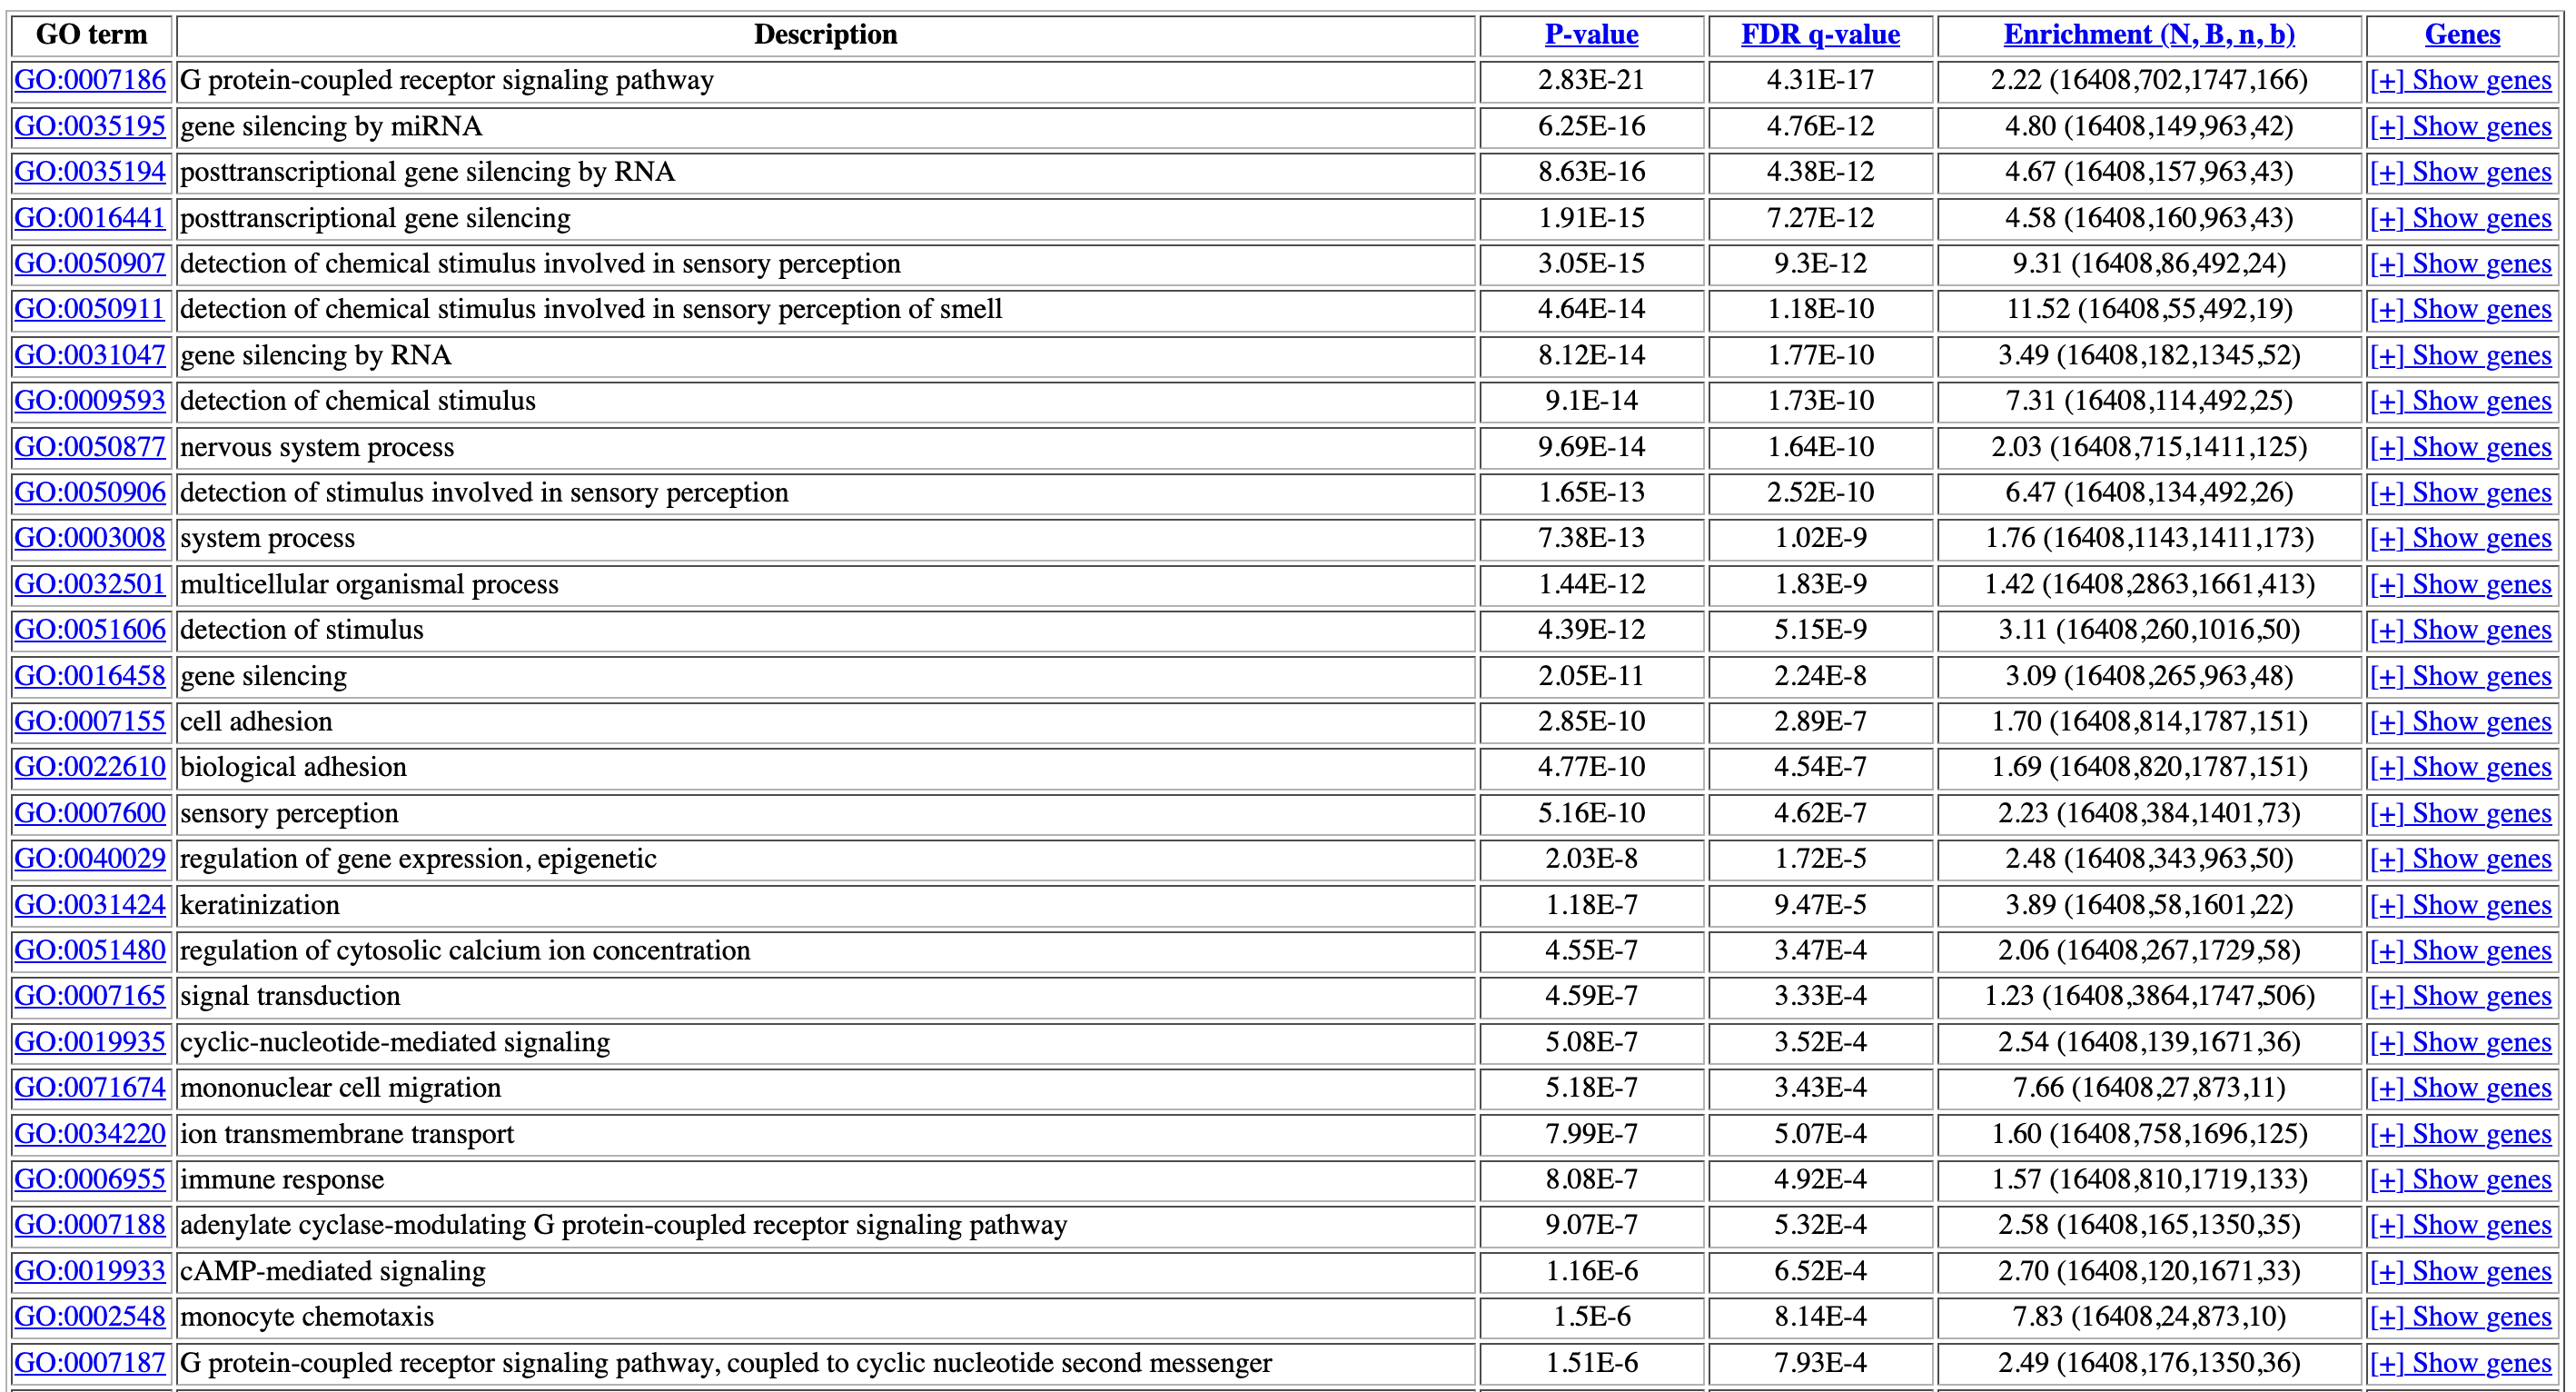

Above, we see the results of Gorilla. Here it shows that the Gene Orthology with the most significance in our upregulated genes (at the top of the ranking) are in a GPCR pathway. This doesn't give us too much information, but since cell proliferation is regulated by a lot of cell signaling via GPCRs, we could say that this makes sense.

If we also look at cell adhesion pathway (around the middle of the list), which we have found with humanmine database, we see that it is very significant here also. 

But, if we look at the number of genes defining the leading edge for cell adhesion, we see around 1700 genes, which is much higher than what we have found with an arbitrary threshold (495). This shows that there are many other genes that have lower fold changes than 2, that can still be considered significantly upregulated.

In [8]:
cat deseq.results.tsv | sort -k3,3g | awk '$3 != "NA" {print $1}' | grep -v Gene > deseq.results.sortFCasc.txt

## GSEA Analysis

GSEA is a tool that also does gene enrichment analysis based on a ranked gene list.

For this analysis, we first need to create a ranked file that contains both gene names and logFC values:

In [10]:
cat deseq.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1, $3}' | grep -v Gene | tr ' ' '\t' > deseq.logFC.rnk

In [11]:
head deseq.logFC.rnk

KB-173C10.2	8.29315394882637
KRT39	6.98373243578222
RN7SKP106	6.01298235087648
AC064834.2	5.98075374412946
RP11-973F15.2	5.95678600881909
AC018742.1	5.87278110594759
FMN2	5.7846575791696
FAM26D	5.7149015133715
CD69	5.7120328303285
TRBV20OR9-2	5.69256492606532


Below we see the GSEA analysis results for our downregulated genes (below in the ranked list):

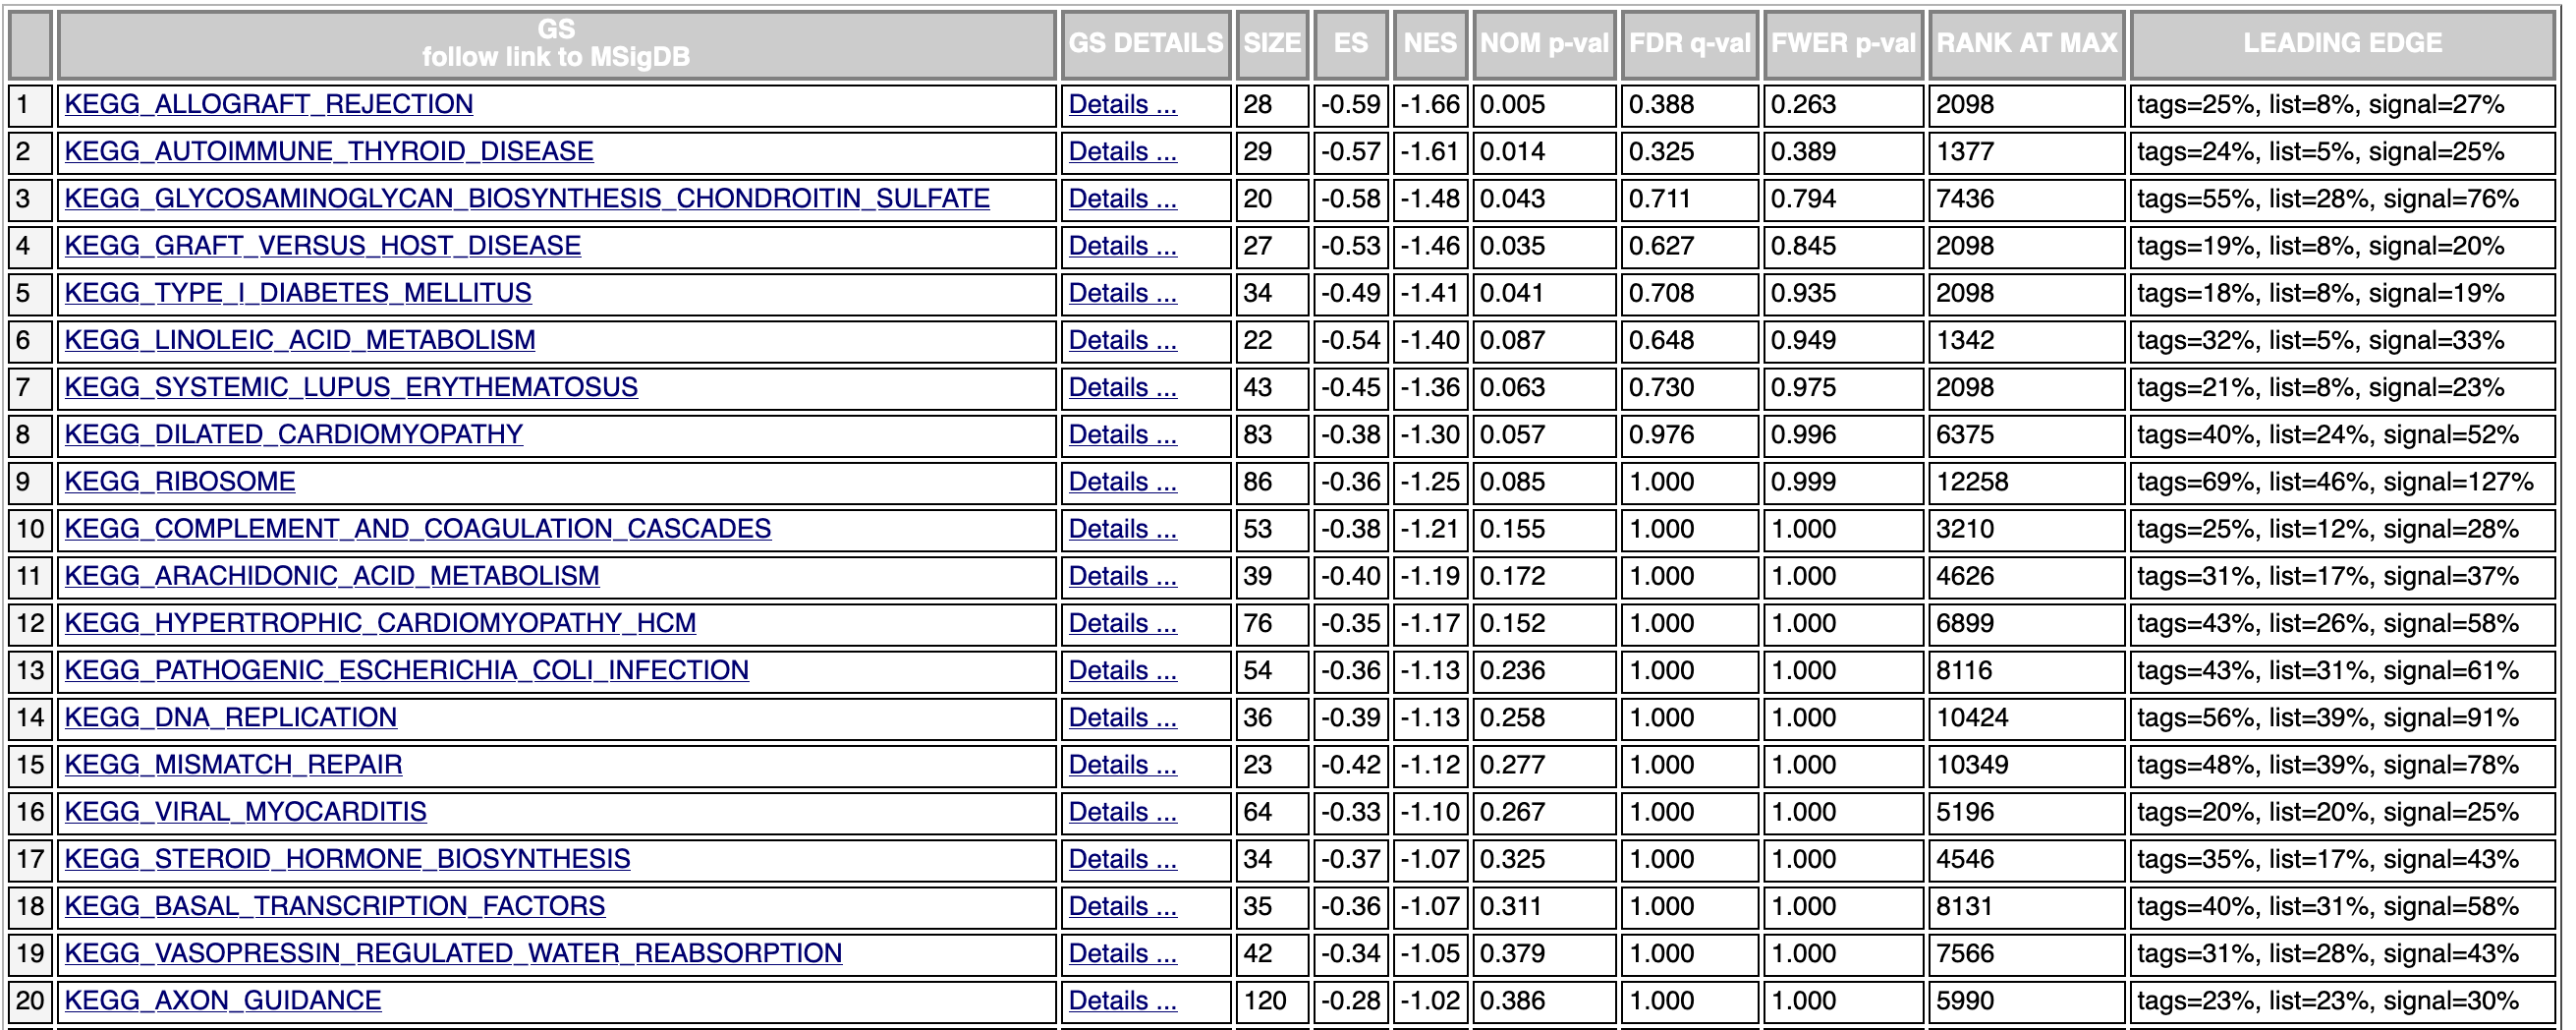

Below we see the GSEA analysis results for the upregulated genes (above in the ranked list):

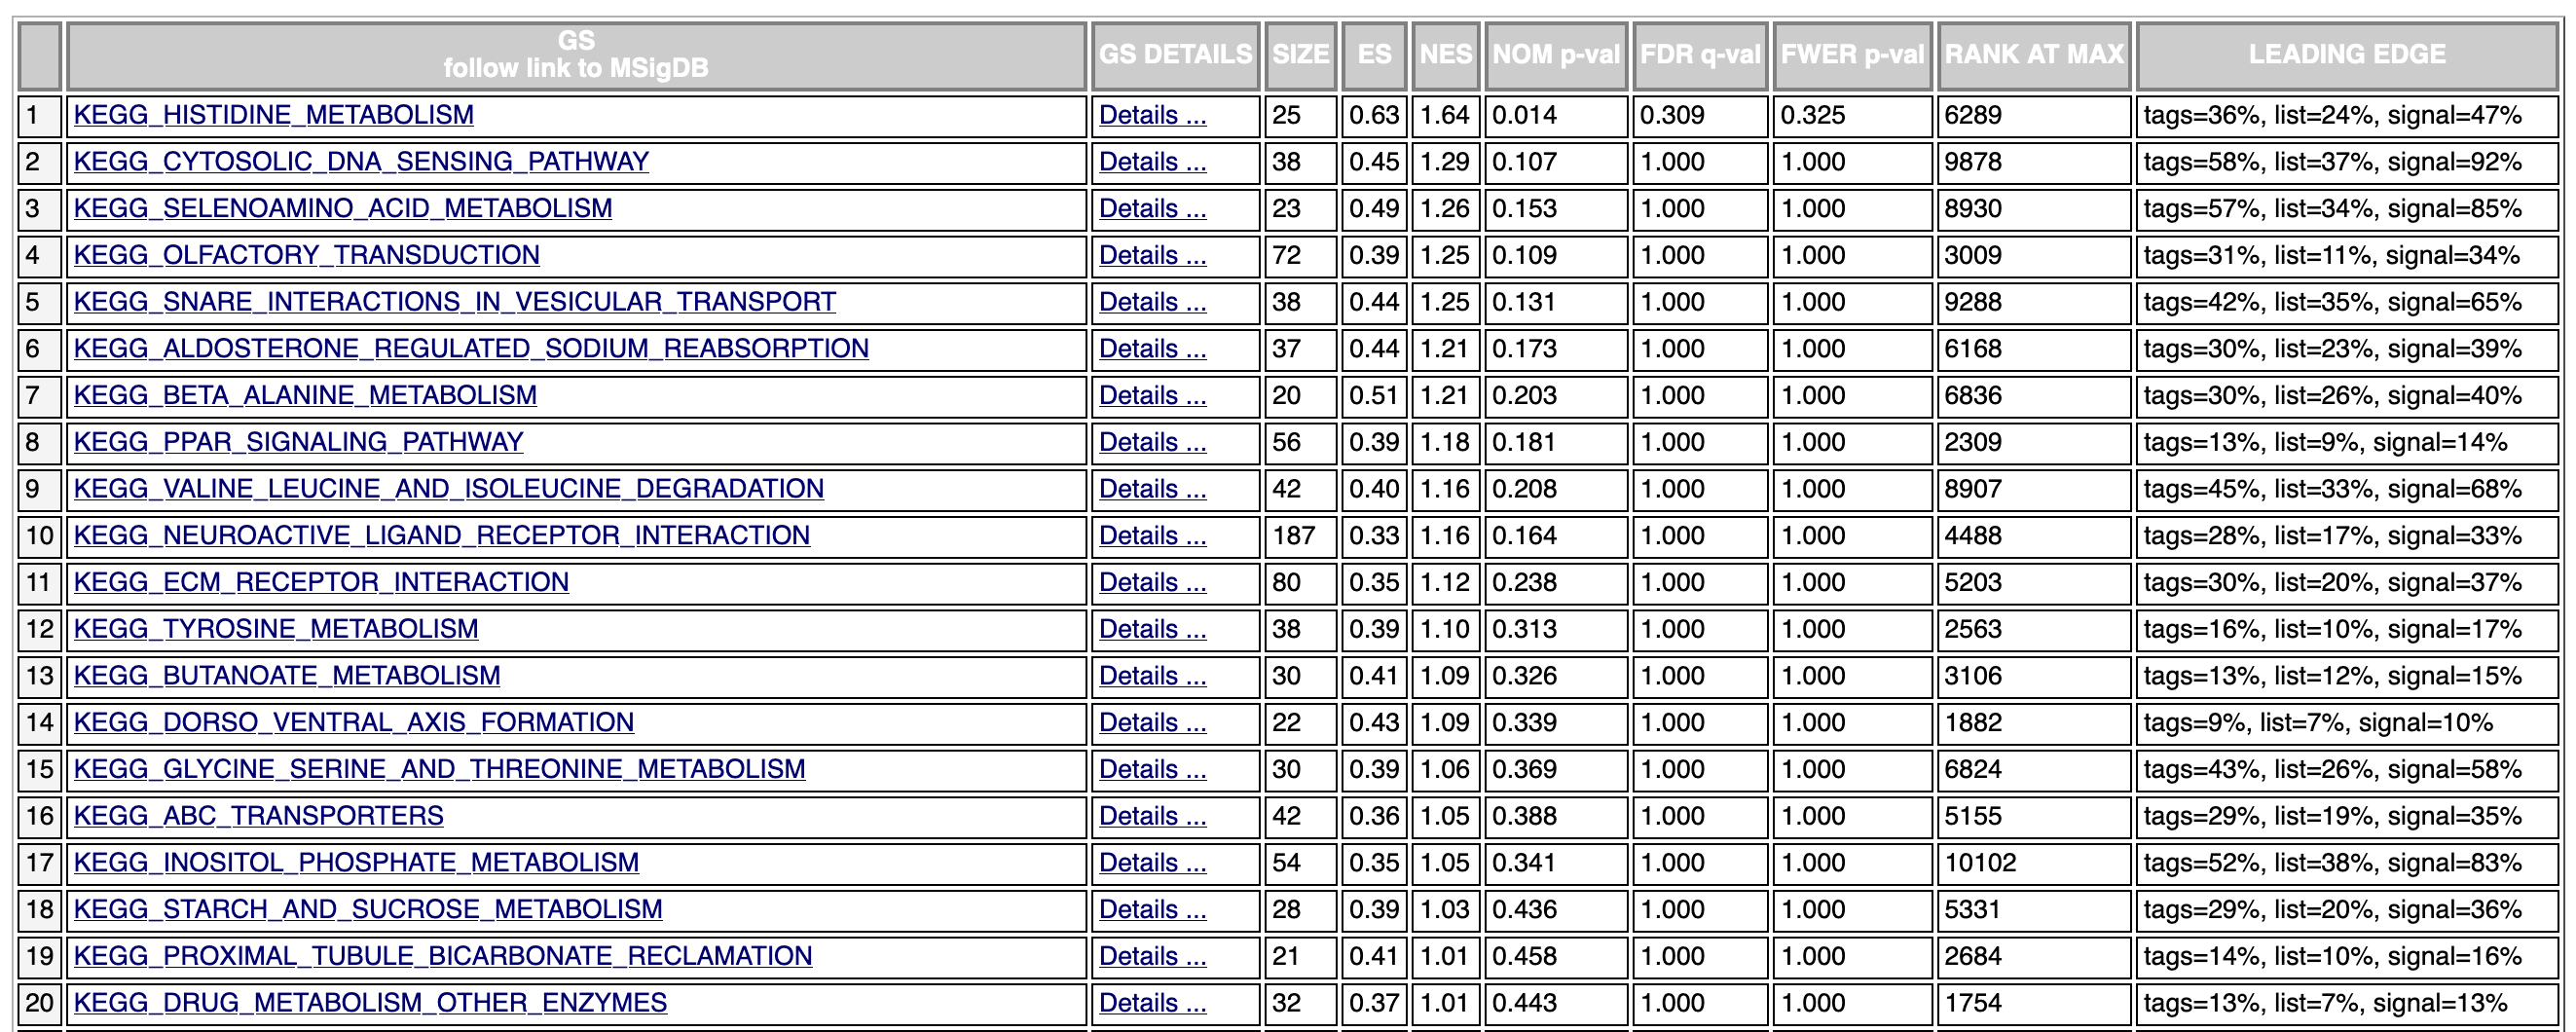

We see in the upregulated genes, an enrichment for ECM receptor interaction (11th on the list), which is also related to mesenchymal transition of epitelia in cancer cell development. We also saw an enrichment for cell adhesion in GOrilla analysis (done with GO terms), and focal adhesions in humanmine analysis. These are all similar to each other (in terms of their relation to our study), and make sense in the concept argued in the paper of the dataset used here.

Below, a GSEA enrichment plot of the ECM receptor interaction plot can be seen. We see that there are also downregulated genes that were associated with this pathway.

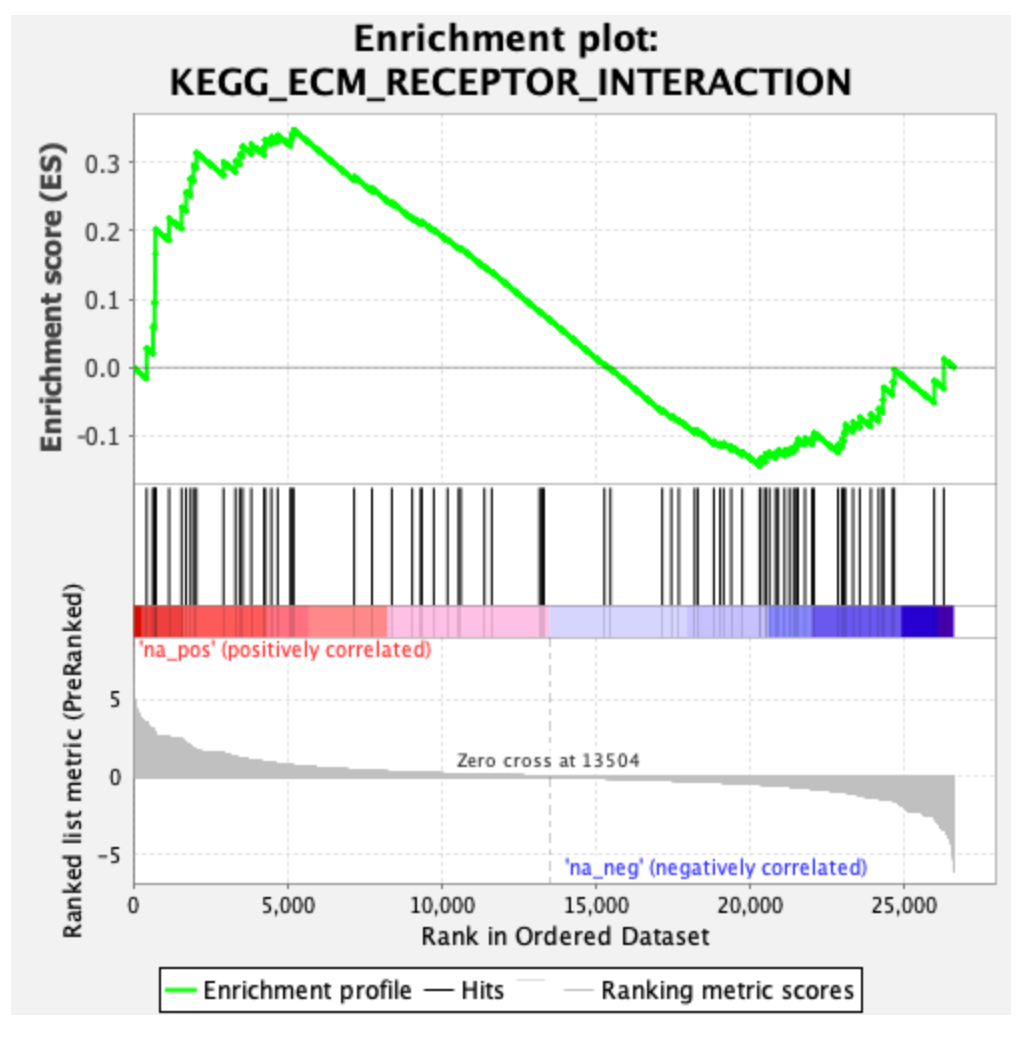

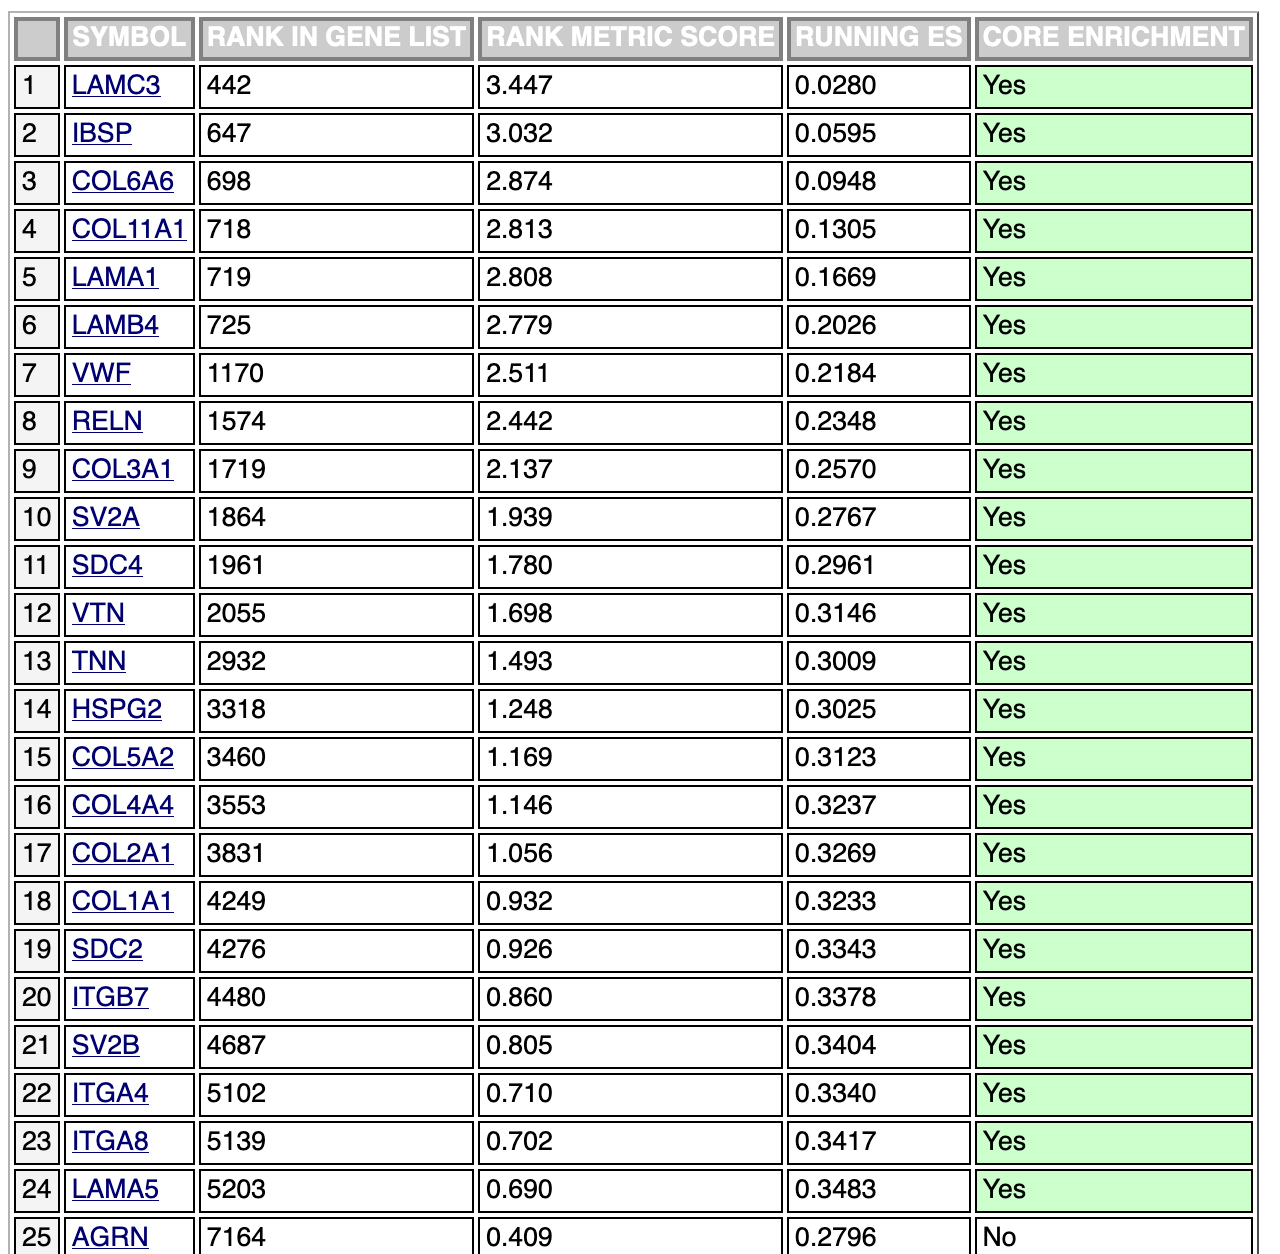

Above, we see genes in our ranked list that were associated with the ECM interaction pathway. In line 24, the last gene in the ranking list associated with this pathway is shown, and it's ranking is 5203. This shows again that using an arbitrary threshold is sometimes not a good idea, making us miss a lot of genes that should be considered upregulated (or downregulated).

## Motif Discovery

With this analysis, we can see the Transcription Factors that cause the upregulation of our differentially expressed genes.

This can be done using the iRegulon app in Cytoscape. It constructs an analysis, comparing the motifs found near our upregulated genes compared to the rest of the genome, and giving as output the significantly enriched motifs, and the most likely TFs they correspond to.

This analysis can give us an idea about how we see the changes (the upregulation), and its mechanisms.

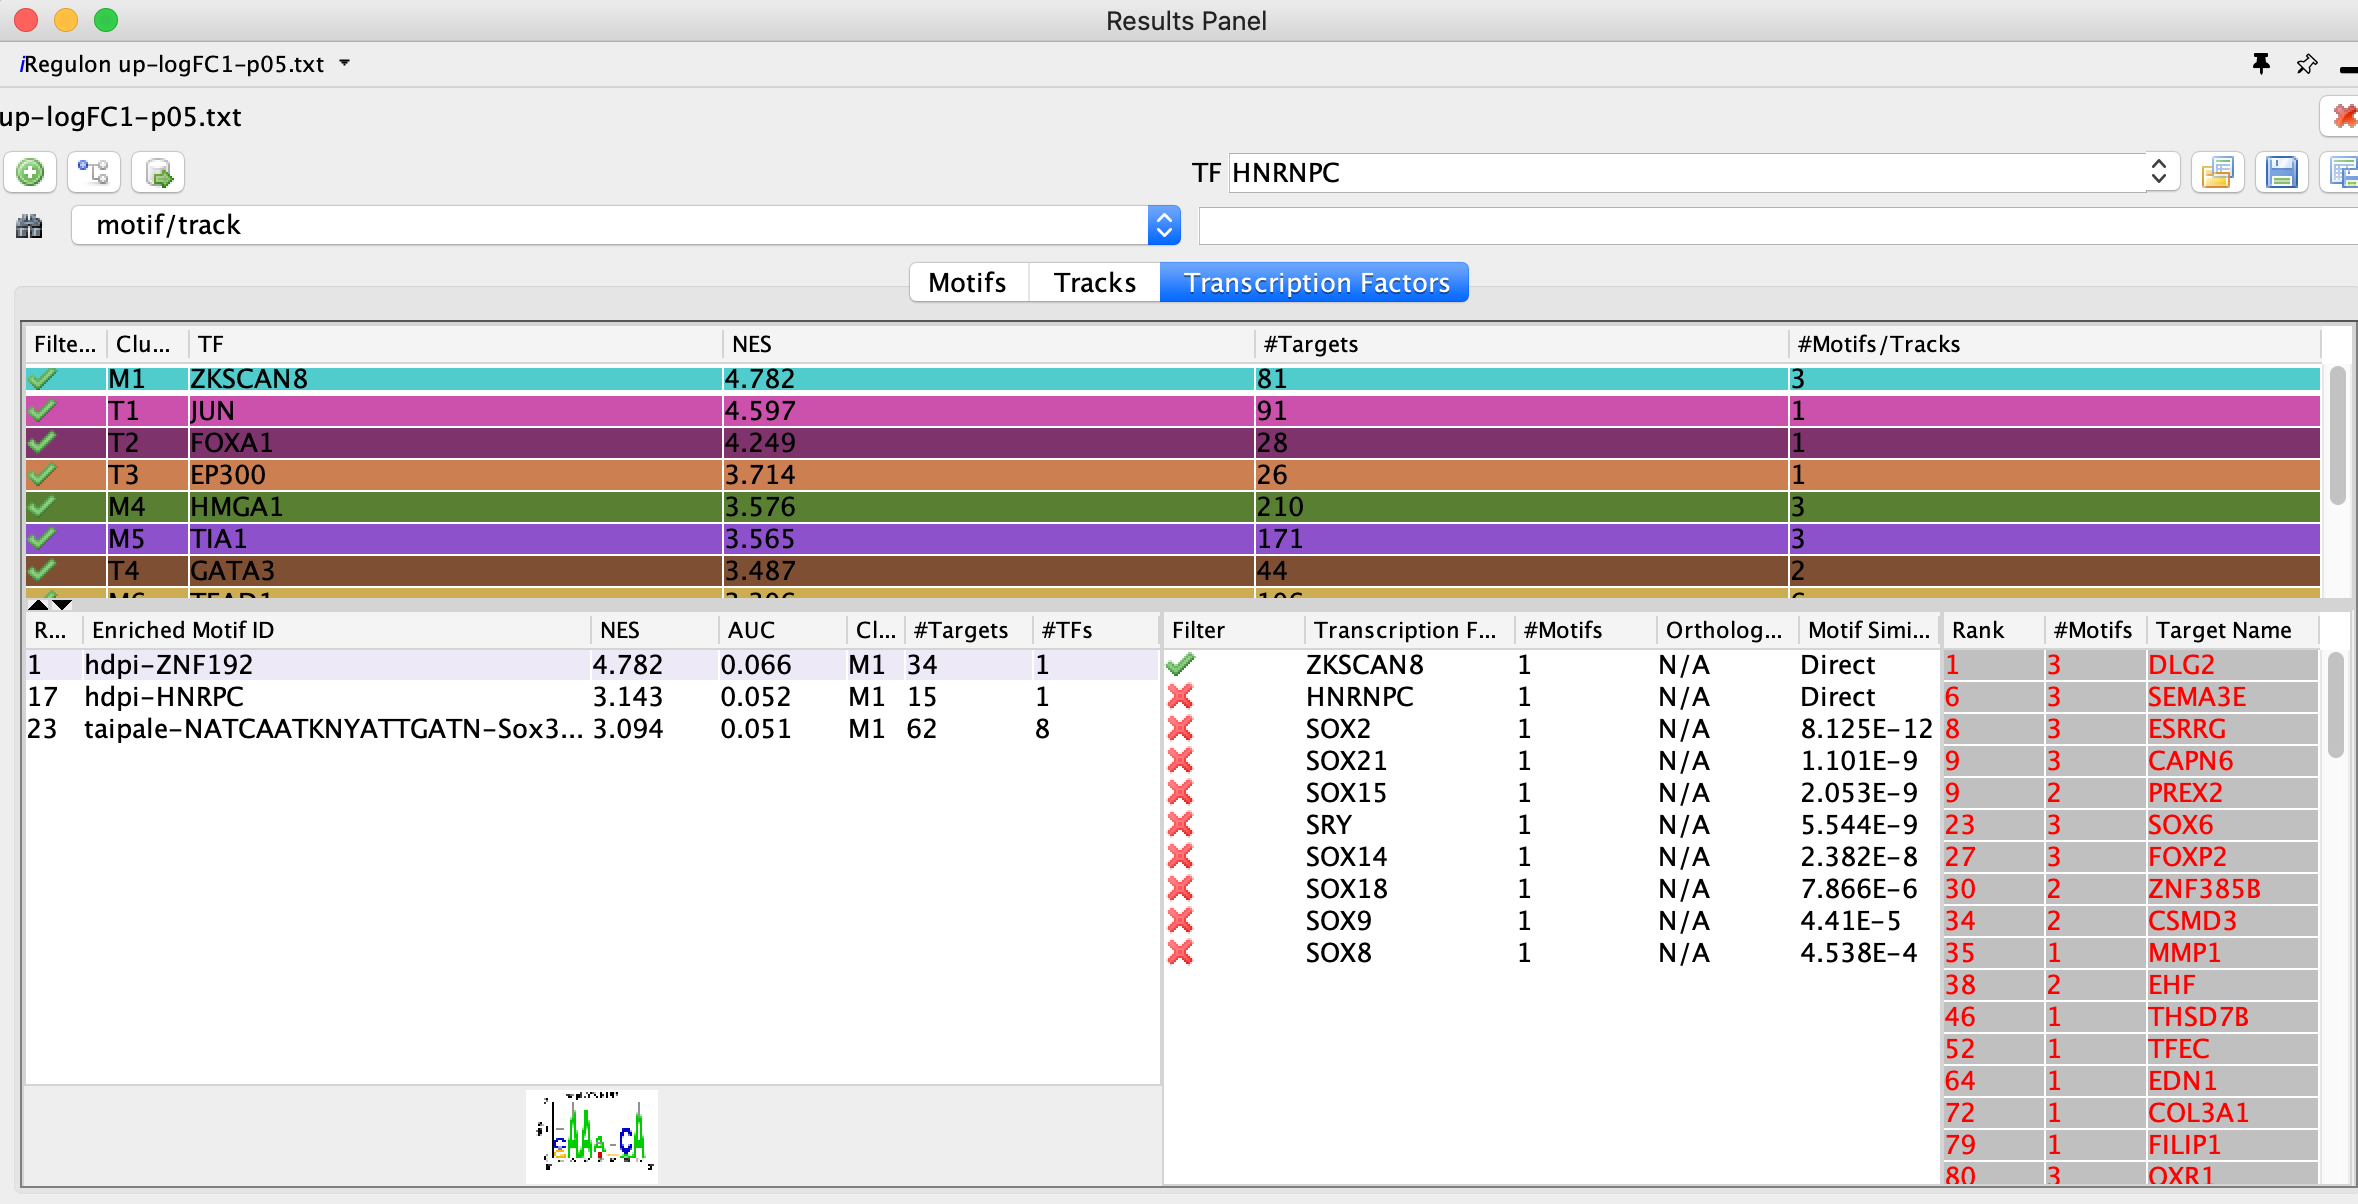

We see above a list of significantly enriched TFs in our upregulated genes (with the arbitrary threshold).

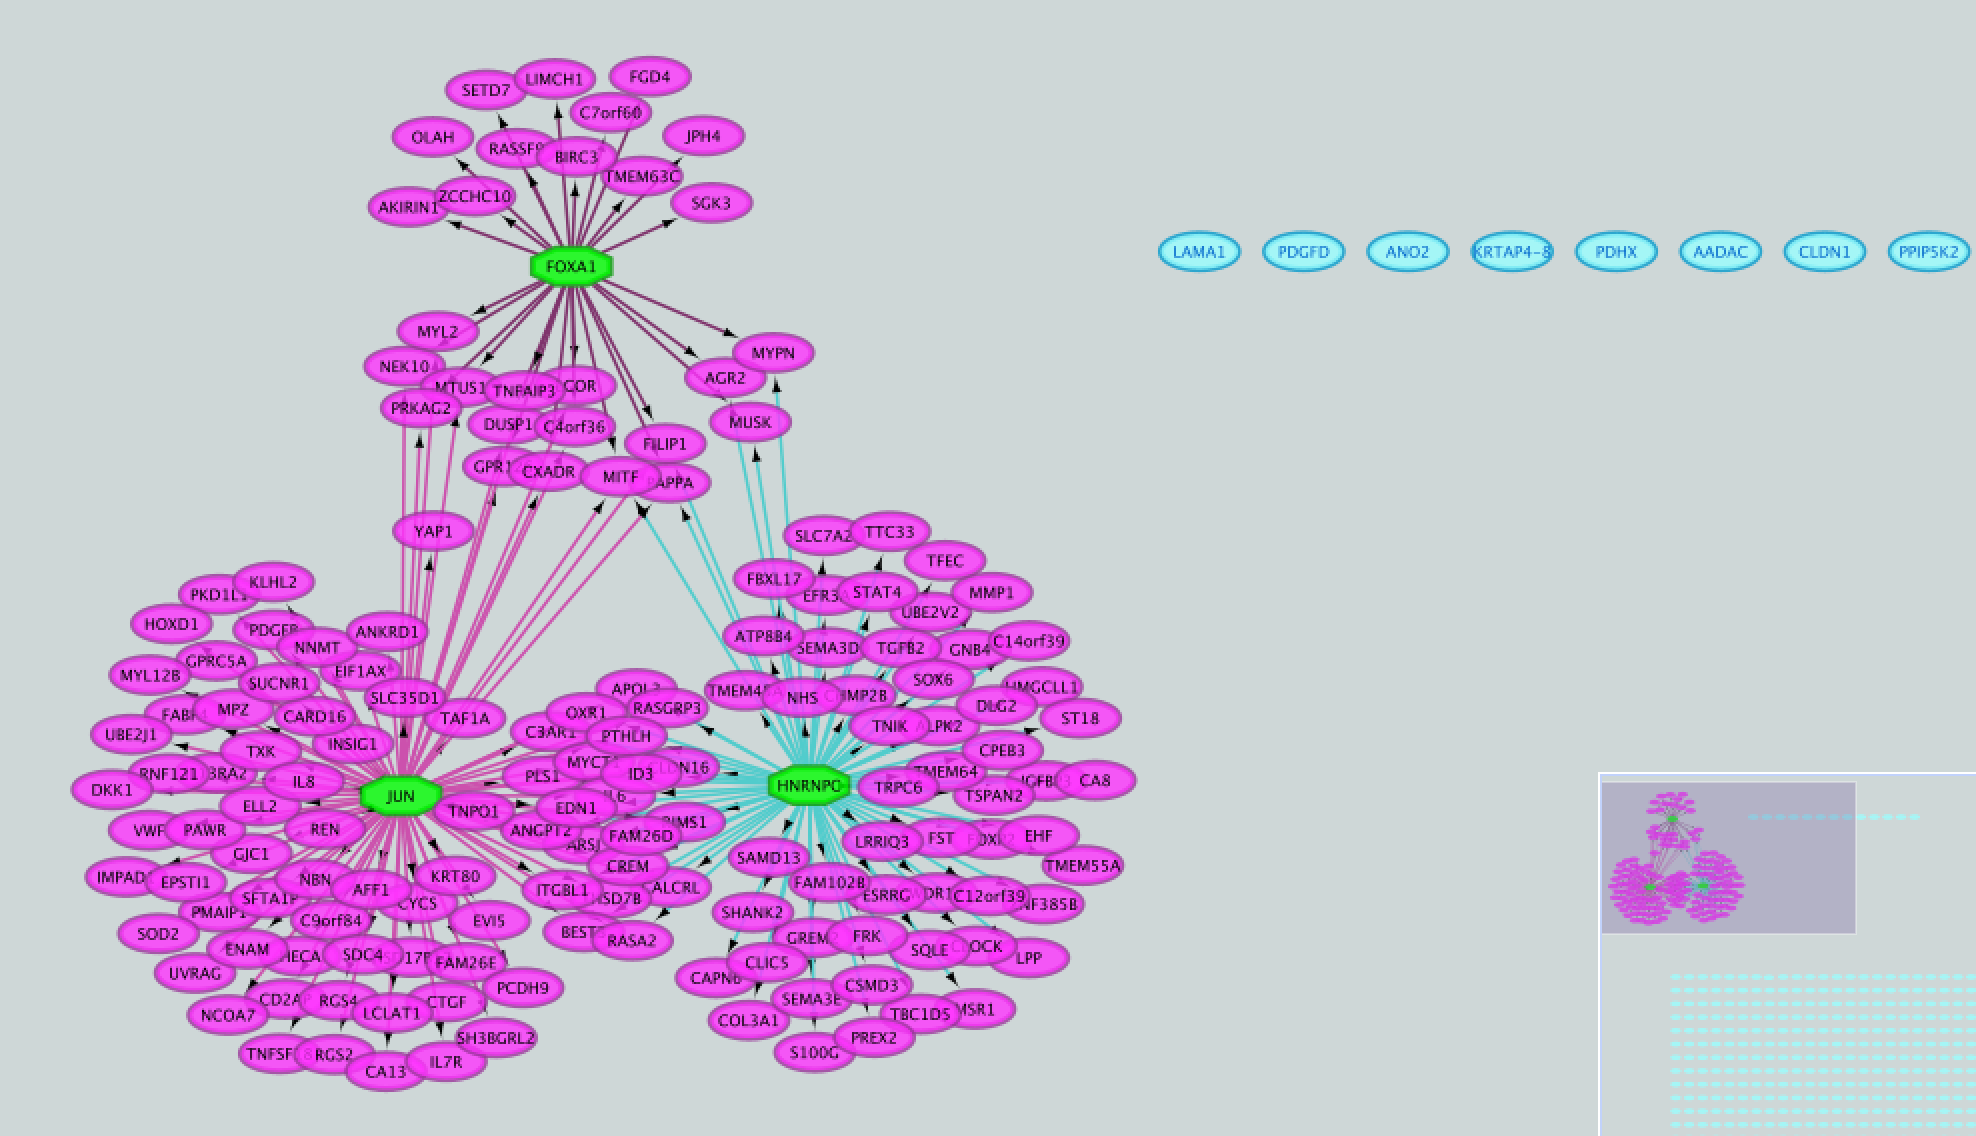

First three TF s that were predicted to be enriched are: HNRNPC, JUN and FOXA1. In the network above, we see all genes that were upregulated in our METTL14 knocdown samples compared to our control samples (based on the arbitrary threshold p-adj = 0.05, logFC = 2). 

These first three TFs were used to construct a network to see which genes they are responsible for upregulating in our gene set. There are many genes that were not matched with either of these TFs (can be seen on the small window to the right bottom, the blue genes are not matched with these TFs), they are matched to TFs that were given lower on the list of iRegulon output. This network is a great tool come up with hypotheses about the mechanism of how these genes (controlled by these TFs) are regulated, which will in turn give us knowledge about why they would be upregulated in response to METTL14 knockdown. 

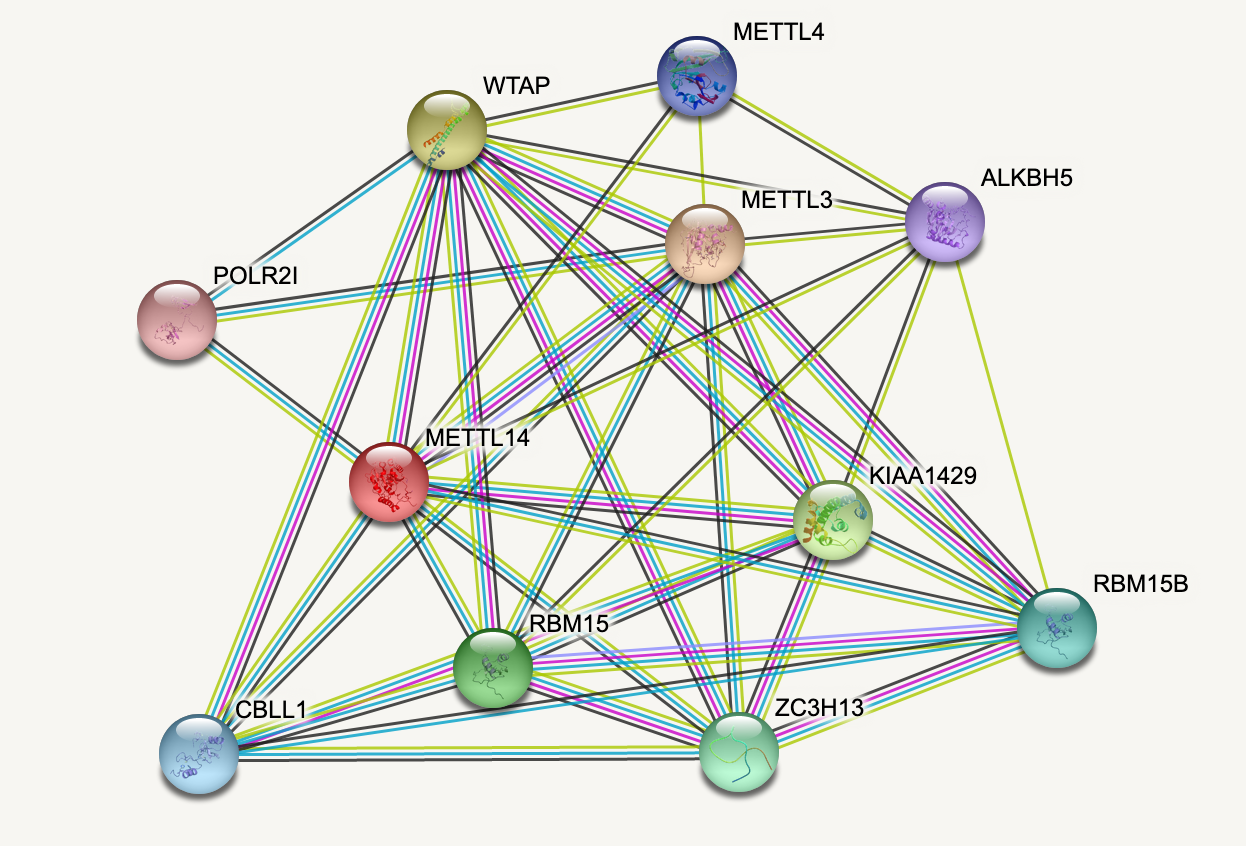
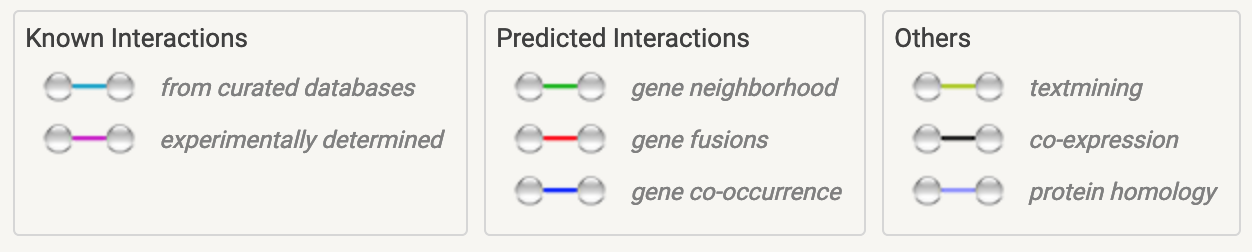

Above, top 10 interactors of METTL14 can be seen in a STRING network. The colors of edges show different types of interactions between these proteins.